In [6]:
library(edgeR)
library(Seurat)
library(dplyr)

decideTests.DGEExact <- decideTests.DGELRT <- function(object,adjust.method="BH",p.value=0.05,lfc=0,...)
{
	decideTestsDGE(object=object,adjust.method=adjust.method,p.value=p.value,lfc=lfc)
}

decideTestsDGE <- function(object,adjust.method="BH",p.value=0.05,lfc=0)
#	Accept or reject hypothesis tests across genes and contrasts
#	edgeR team. Original author was Davis McCarthy.
#	Created 15 August 2010. Last modified 15 July 2018.
{
#	Check object class
	if( !(is(object,"DGEExact") || is(object,"DGELRT")) ) stop("Need DGEExact or DGELRT object")

#	Apply multiple testing
	p <- object$table$PValue
	p <- p.adjust(p, method=adjust.method)
	isDE <- as.integer(p < p.value)

#	Extract logFC
	logFC <- object$table$logFC

#	Check for F-test with multiple logFC columns
	FTest <- is.null(logFC)

#	With multiple contrasts, apply lfc threshold to maximum logFC
	if(FTest) {
		if(lfc>0) {
			coef.col <- grep("^logFC",colnames(object$table))
			logFC <- object$table[,coef.col]
			SmallFC <- rowSums(abs(logFC) >= lfc) == 0
			isDE[SmallFC] <- 0L
		}

#	With single contrast, apply directionality and lfc threshold
	} else {
		isDE[isDE & logFC<0] <- -1L
		SmallFC <- (abs(logFC) < lfc)
		isDE[SmallFC] <- 0L
	}

#	Assemble TestResults object
	isDE <- matrix(isDE, ncol=1)
	row.names(isDE) <- row.names(object)
	colnames(isDE) <- paste(rev(object$comparison),collapse="-")

#	Record possible values
	if(FTest) {
		attr(isDE,"levels") <- c(0L,1L)
		attr(isDE,"labels") <- c("NotSig","Sig")
	} else {
		attr(isDE,"levels") <- c(-1L,0L,1L)
		attr(isDE,"labels") <- c("Down","NotSig","Up")
	}		

	new("TestResults", isDE)
}

Loading required package: limma

Warning message:
“package ‘Seurat’ was built under R version 4.4.1”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.4.1”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.4.1”
‘SeuratObject’ was built with package ‘Matrix’ 1.6.5 but the current
version is 1.7.1; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 10X Breast

In [5]:
b<-readRDS("/QRISdata/Q4386/scRNA/10X/seurat_obj.rds")

In [6]:
b

An object of class Seurat 
36603 features across 5680 samples within 1 assay 
Active assay: RNA (36603 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

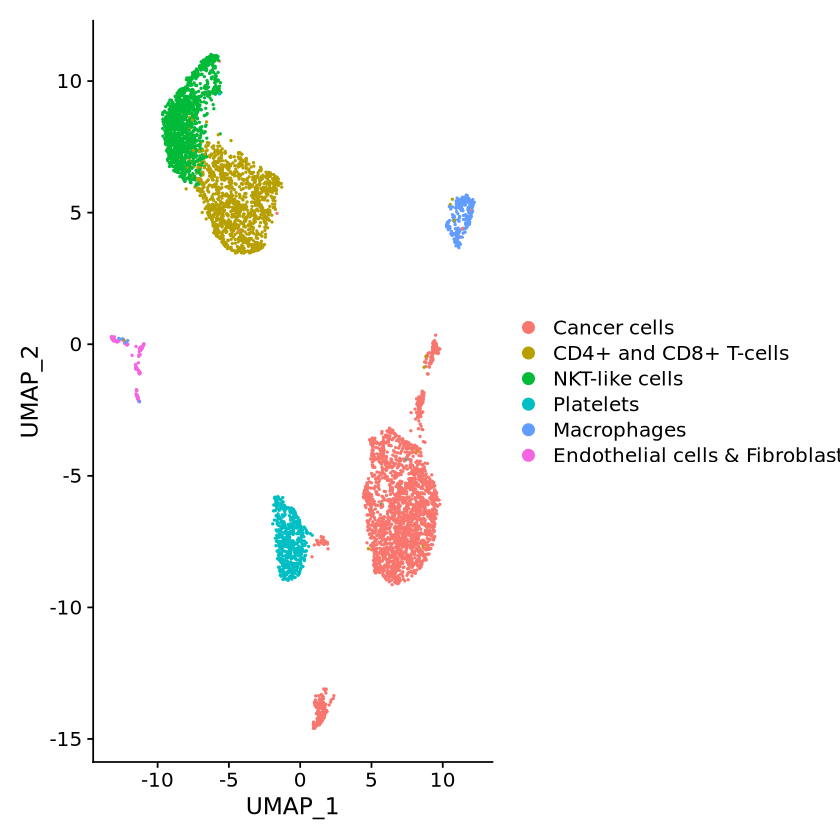

In [7]:

DimPlot(b)

In [11]:
bu<-read.table("/QRISdata/Q4386//all_cuTARs/renamed/rename_new/final_renamed/Breast_DIC_uTARs_renamed_final_mat.txt", row.names = 1, sep="\t", header=TRUE)
head(bu)

,AAACCCAAGATTGGGC.1,AAACCCAGTACTCCGG.1,AAACCCAGTCGTCATA.1,AAACCCATCCTTCTTC.1,AAACCCATCGCCCAGA.1,AAACGAAAGCTCGCAC.1,AAACGAAAGGTAATCA.1,AAACGAAGTATCGAAA.1,AAACGAAGTGGACCAA.1,AAACGAATCCGAGATT.1,⋯,TTTGGTTGTGGAGGTT.1,TTTGGTTTCGCATGAT.1,TTTGGTTTCGCTTGCT.1,TTTGGTTTCTAGACCA.1,TTTGGTTTCTCCGAAA.1,TTTGGTTTCTTCGACC.1,TTTGTTGAGACGGTCA.1,TTTGTTGGTTATTCTC.1,TTTGTTGGTTCCAGGC.1,TTTGTTGTCGATGCAT.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cuTAR100897,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR105460,0,0,0,0,0,0,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,0
cuTAR10778,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR111757,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR134868,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
cuTAR136541,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
tail(rownames(b))

[1] "AC023491.2"                    "AC007325.1"                   
[3] "AC007325.4"                    "AC007325.2"                   
[5] "chr3-4706899-4724549---1533-0" "BRRIAR"

In [13]:
# Make sure columns match Seurat object
all(colnames(bu) == colnames(b))  # should be TRUE


[1] TRUE

In [28]:
# Get original counts
orig_counts <- as.data.frame(GetAssayData(b, assay = "RNA", slot = "counts"))


In [26]:
dim(orig_counts)
dim(bu)

[1] 36603  5680

[1]   81 5680

In [32]:
bu <- bu[, colnames(orig_counts)]  # Reorder df2 to match df1
merged_df <- rbind(orig_counts, bu)


In [33]:
dim(merged_df)

[1] 36684  5680

In [44]:
breast<-CreateSeuratObject(merged_df, meta.data = b@meta.data)

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


In [46]:
head(breast)

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters,new_cell_types
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
AAACCCAAGATTGGGC.1,Breast_DIC,2330,116,2,2,NKT-like cells
AAACCCAGTACTCCGG.1,Breast_DIC,32596,3901,4,4,Cancer cells
AAACCCAGTCGTCATA.1,Breast_DIC,49372,6058,0,0,Cancer cells
AAACCCATCCTTCTTC.1,Breast_DIC,7170,2081,5,5,Macrophages
AAACCCATCGCCCAGA.1,Breast_DIC,711,389,6,6,NKT-like cells
AAACGAAAGCTCGCAC.1,Breast_DIC,44434,4984,8,8,Cancer cells
AAACGAAAGGTAATCA.1,Breast_DIC,10951,3459,9,9,Endothelial cells & Fibroblasts
AAACGAAGTATCGAAA.1,Breast_DIC,6277,349,2,2,NKT-like cells
AAACGAAGTGGACCAA.1,Breast_DIC,4139,149,2,2,NKT-like cells


In [3]:
bed<-read.csv("/QRISdata/Q4386/all_cuTARs/all_cuTARs_refined_after_gencode47_clean.bed",sep="\t",header=FALSE)
head(bed)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1,9999,10399,cuTAR75,.,-
2,chr1,14249,30349,cuTAR76,.,+
3,chr1,14399,30799,cuTAR77,.,-
4,chr1,31649,34049,cuTAR78,.,-
5,chr1,36399,45099,cuTAR79,.,+
6,chr1,45599,46999,cuTAR80,.,-


In [52]:
dim(bu)

[1]   81 5680

In [53]:
bu2 <- bu[rownames(bu) %in% bed$V4, ]
dim(bu2)

[1]   80 5680

In [47]:
nDiffFeat<-5
cells<-2
feats<-100
nFeatMin<-200
nFeatMax<-2500
pcaDims<-30
res_param<-0.2

Normalizing layer: counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
Warning message:
“The following 10445 features requested have zero variance; running reduction without them: MIR1302-2HG, FAM138A, OR4F5, AL627309.2, AL627309.4, AL732372.1, OR4F29, OR4F16, AL645608.6, AL645608.5, TMEM88B, AL139246.4, AL831784.1, AL592464.2, AL592464.1, AL589702.1, ACTRT2, AL008733.1, AL590438.1, AL354743.1, AL136528.2, LINC01346, LINC01345, LINC02780, LINC01777, AL355602.1, Z98747.1, LINC01646, BX005132.1, LINC02781, LINC02782, Z98259.3, Z98259.2, Z98259.1, HES3, AL512330.1, Z97987.1, AL359881.3, Z98884.1, CA6, SLC2A7, AL928921.1, PIK3CD-AS1, AL603962.1, MTOR-AS1, ANGPTL7, AL031291.1, NPPB, TNFRSF8, AL357835.1, LINC02766, AADACL4, AADACL3, C1orf158, PRAMEF12, PRAMEF1, LINC01784, PRAMEF11, PRAMEF2, PRAMEF4, PRAMEF10, PRAMEF7, PRAMEF6, PRAMEF27, HNRNPCL3, PRAMEF25, AC245056.1, PRAMEF26, HNRNPCL4, PRAMEF9, PRAMEF13, PRAM

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5680
Number of edges: 54358

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9353
Number of communities: 6
Elapsed time: 0 seconds


Warning message:
“The following arguments are not used: check_duplicates”
15:18:45 UMAP embedding parameters a = 0.9922 b = 1.112

15:18:45 Read 5680 rows and found 30 numeric columns

15:18:45 Using Annoy for neighbor search, n_neighbors = 30

15:18:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:18:46 Writing NN index file to temp file /scratch/temp/13669769/RtmpODEFY3/file3b430644b49805

15:18:46 Searching Annoy index using 1 thread, search_k = 3000

15:18:48 Annoy recall = 100%

15:18:48 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:18:50 Initializing from normalized Laplacian + noise (using RSpectra)

15:18:50 Commencing optimization for 500 epochs, with 246530 positive edges

15:18:58 Optimization finished



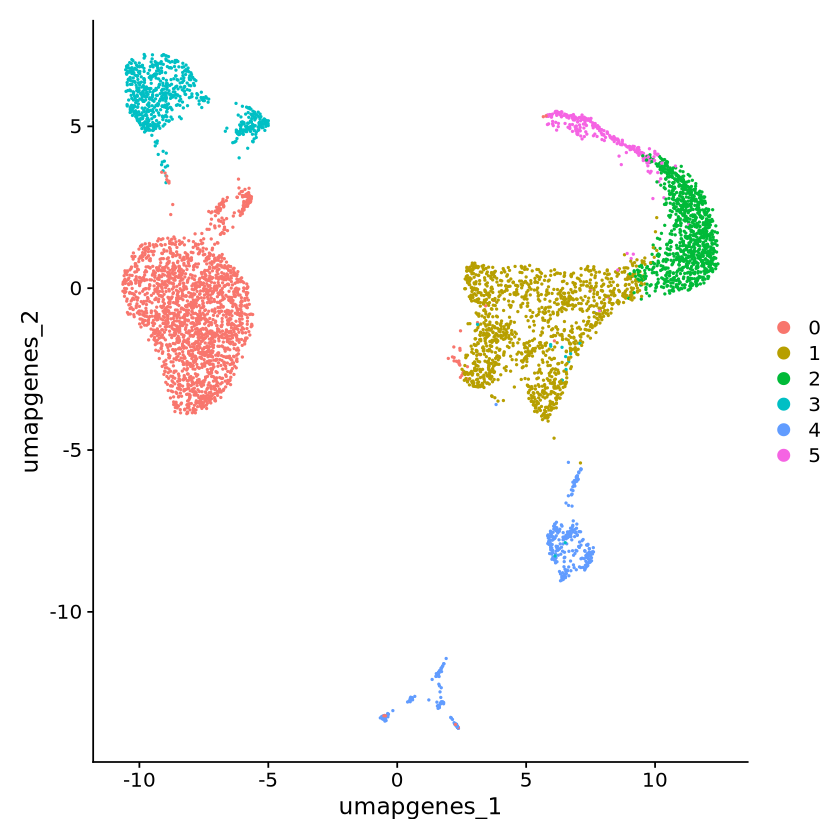

In [65]:
breast <- NormalizeData(breast)
breast <- ScaleData(breast)#, features = rownames(orig_counts), )
breast <- RunPCA(object = breast, reduction.name="pca_genes",features = rownames(orig_counts))
breast <- FindNeighbors(object=breast, reduction="pca_genes", graph.name="gene_snn",dims=1:30, )
breast <- FindClusters(object=breast,graph.name="gene_snn",resolution=res_param)
breast <- RunUMAP(breast,reduction.name="umap_genes",reduction="pca_genes",dims=1:30,check_duplicates = F)
DimPlot(breast, reduction = "umap_genes")


pdf 
  2

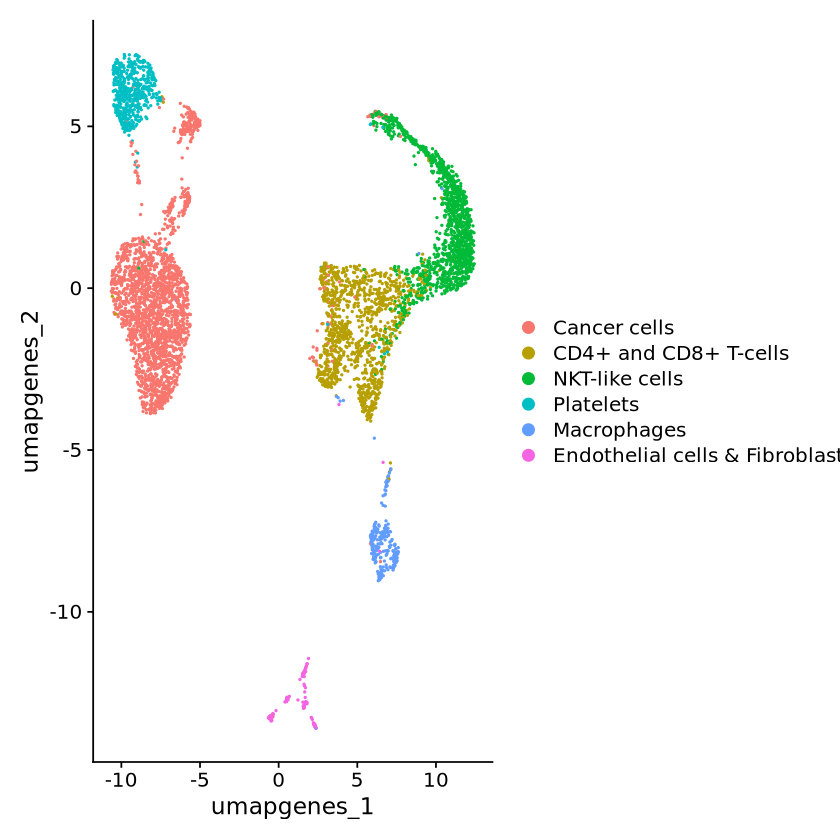

In [66]:
Idents(breast)<-breast$new_cell_types
pdf("breast_UMAP.pdf",width=8, height=6)
DimPlot(breast, reduction = "umap_genes")
dev.off()

DimPlot(breast, reduction = "umap_genes")


Calculating cluster Cancer cells

Calculating cluster CD4+ and CD8+ T-cells

Calculating cluster NKT-like cells

Warning message in FindMarkers.default(object = data.use, cells.1 = cells.1, cells.2 = cells.2, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster Platelets

Calculating cluster Macrophages

Calculating cluster Endothelial cells & Fibroblasts



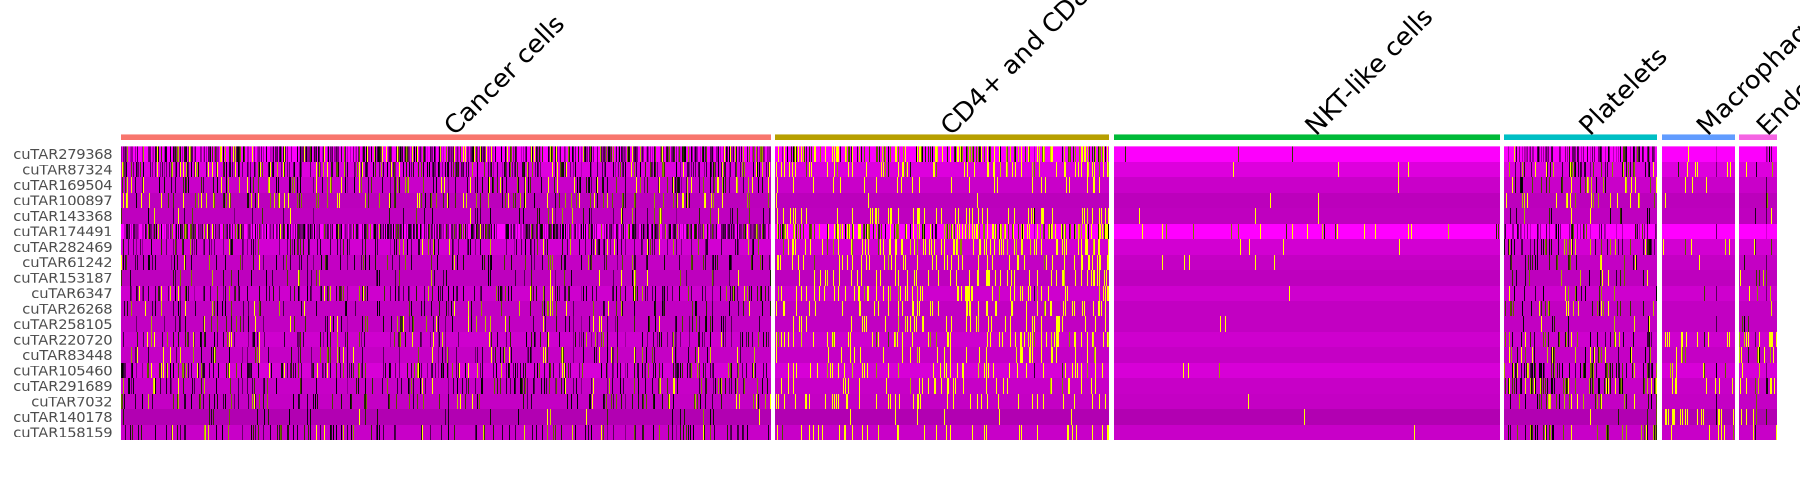

In [69]:
options(repr.plot.width = 15, repr.plot.height = 4)

#Differential uTAR expression
Aall.markers <- FindAllMarkers(breast, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1, features = rownames(bu))
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
#pdf("breast_DE_HM_filtered.pdf")
DoHeatmap(breast, features = Atop10$gene) + NoLegend()
#dev.off()


In [73]:
breast <- SCTransform(breast, verbose = FALSE)


In [74]:
breast

An object of class Seurat 
58389 features across 5680 samples within 2 assays 
Active assay: SCT (21705 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca_genes, umap_genes

Calculating cluster Cancer cells

Calculating cluster CD4+ and CD8+ T-cells

Calculating cluster NKT-like cells

Warning message in FindMarkers.default(object = data.use, cells.1 = cells.1, cells.2 = cells.2, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster Platelets

Calculating cluster Macrophages

Calculating cluster Endothelial cells & Fibroblasts



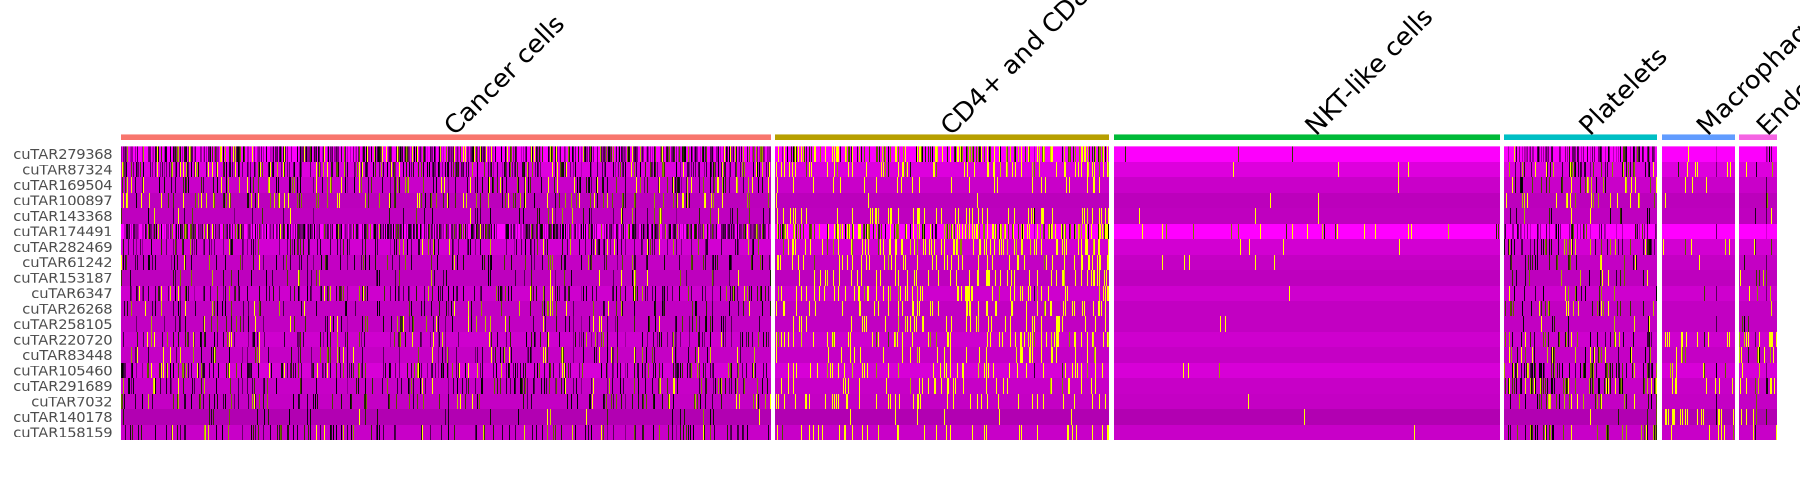

In [138]:
options(repr.plot.width = 15, repr.plot.height = 4)

#Differential uTAR expression
Aall.markers <- FindAllMarkers(breast, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0, features = rownames(bu))
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
#pdf("breast_DE_HM_filtered.pdf")
DoHeatmap(breast, features = Atop10$gene) + NoLegend()
#dev.off()


In [77]:
unique(breast$new_cell_types)

[1] NKT-like cells                  Cancer cells                   
[3] Macrophages                     Endothelial cells & Fibroblasts
[5] CD4+ and CD8+ T-cells           Platelets                      
6 Levels: Cancer cells CD4+ and CD8+ T-cells NKT-like cells ... Endothelial cells & Fibroblasts

In [87]:
DefaultAssay(breast)<-"RNA"

In [97]:
head(breast@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters,new_cell_types,gene_snn_res.0.2,nCount_SCT,nFeature_SCT
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
AAACCCAAGATTGGGC.1,Breast_DIC,2330,116,2,2,NKT-like cells,2,12526,1170
AAACCCAGTACTCCGG.1,Breast_DIC,32597,3902,4,0,Cancer cells,0,11570,2095
AAACCCAGTCGTCATA.1,Breast_DIC,49381,6062,0,0,Cancer cells,0,11802,3025
AAACCCATCCTTCTTC.1,Breast_DIC,7173,2083,5,4,Macrophages,4,10415,2078
AAACCCATCGCCCAGA.1,Breast_DIC,711,389,6,5,NKT-like cells,5,9186,1845
AAACGAAAGCTCGCAC.1,Breast_DIC,44435,4985,8,3,Cancer cells,3,11467,2258


In [102]:
#breats_cuTAR <- CreateSeuratObject(bu, meta.data = breast@meta.data)
# Subset Seurat object to include features after row 36603


# Assuming 'seurat_obj' is your Seurat object and 'new_cell_types' is the metadata column
# that defines the different groups of cells.

# Create a function to assign random clusters
breast@meta.data$pb_cluster<-""
samples <- unique(breast$new_cell_types)
for (s in samples) {
  cell_ids <- WhichCells(breast, expression = new_cell_types == s)
  breast$pb_cluster[cell_ids] <- sample(1:5, length(cell_ids), replace = TRUE)
}
# Check the new 'pb_cluster' column
head(breast$pb_cluster)


AAACCCAAGATTGGGC.1 AAACCCAGTACTCCGG.1 AAACCCAGTCGTCATA.1 AAACCCATCCTTCTTC.1 
               "1"                "1"                "4"                "1" 
AAACCCATCGCCCAGA.1 AAACGAAAGCTCGCAC.1 
               "4"                "1"

In [90]:
tail(rownames(breast))

[1] "cuTAR73054" "cuTAR83448" "cuTAR86922" "cuTAR87324" "cuTAR88728"
[6] "cuTAR98229"

[1] 0.0160864

[1] 0.0160864

,Cancer cells,CD4+ and CD8+ T-cells,Endothelial cells & Fibroblasts,Macrophages,NKT-like cells,Platelets
Int,0.0,0.0,0.0,0.0,0.0,0.0
CD4+ and CD8+ T-cells,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
Endothelial cells & Fibroblasts,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
Macrophages,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
NKT-like cells,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
Platelets,-0.2,-0.2,-0.2,-0.2,-0.2,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


,Cancer cells_vs_others,CD4+ and CD8+ T-cells_vs_others,Endothelial cells & Fibroblasts_vs_others,Macrophages_vs_others,NKT-like cells_vs_others,Platelets_vs_others
Down,12,4,6,13,0,9
NotSig,64,54,74,62,60,67
Up,5,23,1,6,21,5


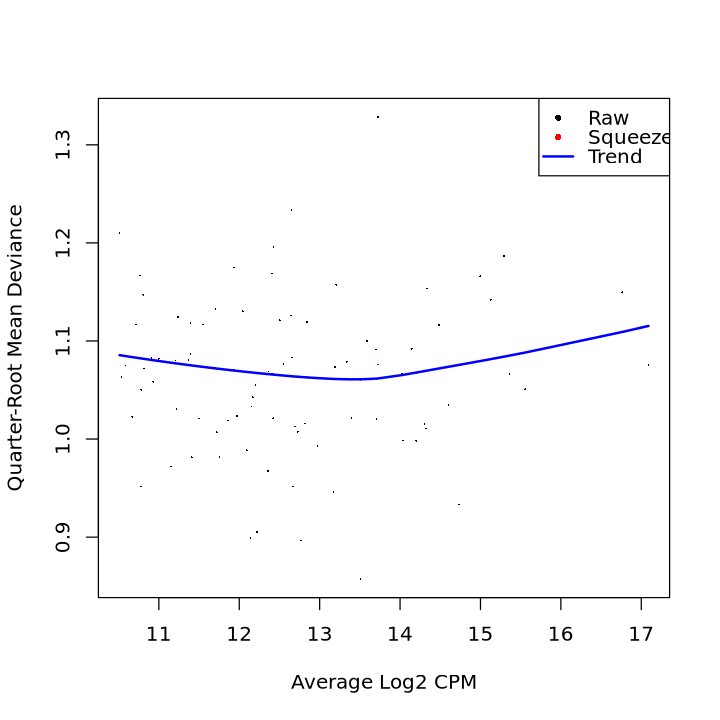

In [121]:
y<-Seurat2PB(breast,sample="pb_cluster", cluster="new_cell_types")
y<-normLibSizes(y)
cuTARs <- rownames(y)[grep("^cuTAR", rownames(y))]
y<-y[cuTARs,,keep=FALSE]

#MDS plots
cluster<-as.factor(y$samples$cluster) 
#design matrix
donor<-factor(y$sample$sample)
design<-model.matrix(~cluster+donor)
colnames(design)<-gsub("donor","",colnames(design))
colnames(design)<-gsub("cluster","",colnames(design))
colnames(design)[1]<-"Int"

#dispersion estimates
#Dispersion Estimation
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g
y<-estimateDisp(y,design,robust=TRUE)
y$common.dispersion #0.14  #0.2852. #V3 0.05g


fit<-glmQLFit(y,design,robust=TRUE) 


## Marker gene identification
ncls<-nlevels(cluster) 
contr<-rbind(matrix(1/(1-ncls),ncls,ncls), +matrix(0,ncol(design)-ncls,ncls)) 
diag(contr)<-1 
contr[1,]<-0 
rownames(contr)<-colnames(design) 
colnames(contr)<-levels(cluster)
contr

# Qasi-likelihood f-test for each comprison
qlf<-list() 
for(i in 1:ncls){ 
  qlf[[i]]<-glmQLFTest(fit,contrast=contr[,i]) 
  qlf[[i]]$comparison<-paste0(levels(cluster)[i],"_vs_others") 
}
options(repr.plot.width = 6, repr.plot.height = 6)
cluster<-as.factor(y$samples$cluster) 
#pdf("MDS_edgeR_SCC_KC_only_corrected_labels.pdf")
#plotMDS(y,pch=16,col=c(2:8)[cluster],main="MDS") 
#legend("topleft",legend=paste0(levels(cluster)), pch=14,col=2:8,cex=0.8)
#dev.off()
#plotMDS(y,pch=16,col=c(2:8)[cluster],main="MDS") 
#pdf("dispersion.pdf")
#plotBCV(y)
#dev.off()

#pdf("QLdisp.pdf")
plotQLDisp(fit)
#dev.off()

dt<-lapply(lapply(qlf,decideTestsDGE),summary) 
dt.all<-do.call("cbind",dt) 
head(dt.all)
#write.table(dt.all,"KC_only_cluster_wise_stats_labels_corrected.txt",sep="\t",quote=FALSE,row.names=TRUE)


In [126]:
top <- 10  # Number of top genes to select from each direction (up and down)
topMarkers <- list()

for (i in 1:ncls) {
  # Get the table for the current cluster
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  current_table <- qlf[[i]]$table

  # Order genes by PValue, then by logFC (positive and negative separately)
  ordered_genes <- current_table[order(current_table$PValue, decreasing = FALSE), ]
  ordered_genes <- ordered_genes[ordered_genes$FDR < 0.05, ]

  # Filter for upregulated genes (logFC > 0)
  upregulated <- ordered_genes[ordered_genes$logFC > 2, ]
  upregulated <- upregulated[order(-upregulated$logFC), ]  # Sort by descending logFC
  
  # Filter for downregulated genes (logFC < 0)
  downregulated <- ordered_genes[ordered_genes$logFC < 2, ]
  downregulated <- downregulated[order(downregulated$logFC), ]  # Sort by ascending logFC
  
  # Remove unwanted genes (e.g., RPS, RPL, LINC)
  upregulated <- upregulated[!grepl("^RPS|^RPL|^LINC", rownames(upregulated)), ]
  downregulated <- downregulated[!grepl("^RPS|^RPL|^LINC", rownames(downregulated)), ]
  
  # Select top N genes from both up and down
  top_up <- head(rownames(upregulated), top)
  top_down <- head(rownames(downregulated), top)
  
  # Combine selected genes for this cluster
  topMarkers[[i]] <- c(top_up, top_down)
}

# Combine all selected genes into a single list
combined_topMarkers <- unlist(topMarkers, use.names = FALSE)

# Remove duplicates if necessary
combined_topMarkers <- unique(combined_topMarkers)

# Print the total number of genes in the final list
length(combined_topMarkers)

# Final result: `combined_topMarkers` contains top genes (upregulated and downregulated) for all clusters
topMarkers <-combined_topMarkers

[1] 43

In [127]:
lcpm<-cpm(y,log=TRUE) 
annot<-data.frame(cluster=cluster) 
rownames(annot)<-colnames(y) 
ann_colors<-list(cluster=0:5) 
names(ann_colors$cluster)<-levels(cluster)

In [124]:
colnames(lcpm)

[1] "1_clusterCancer cells"                   
 [2] "1_clusterCD4+ and CD8+ T-cells"          
 [3] "1_clusterEndothelial cells & Fibroblasts"
 [4] "1_clusterMacrophages"                    
 [5] "1_clusterNKT-like cells"                 
 [6] "1_clusterPlatelets"                      
 [7] "2_clusterCancer cells"                   
 [8] "2_clusterCD4+ and CD8+ T-cells"          
 [9] "2_clusterEndothelial cells & Fibroblasts"
[10] "2_clusterMacrophages"                    
[11] "2_clusterNKT-like cells"                 
[12] "2_clusterPlatelets"                      
[13] "3_clusterCancer cells"                   
[14] "3_clusterCD4+ and CD8+ T-cells"          
[15] "3_clusterEndothelial cells & Fibroblasts"
[16] "3_clusterMacrophages"                    
[17] "3_clusterNKT-like cells"                 
[18] "3_clusterPlatelets"                      
[19] "4_clusterCancer cells"                   
[20] "4_clusterCD4+ and CD8+ T-cells"          
[21] "4_clusterEndothelial cells & Fibroblasts"
[22] "4_clusterMacrophages"                    
[23] "4_clusterNKT-like cells"                 
[24] "4_clusterPlatelets"                      
[25] "5_clusterCancer cells"                   
[26] "5_clusterCD4+ and CD8+ T-cells"          
[27] "5_clusterEndothelial cells & Fibroblasts"
[28] "5_clusterMacrophages"                    
[29] "5_clusterNKT-like cells"                 
[30] "5_clusterPlatelets"

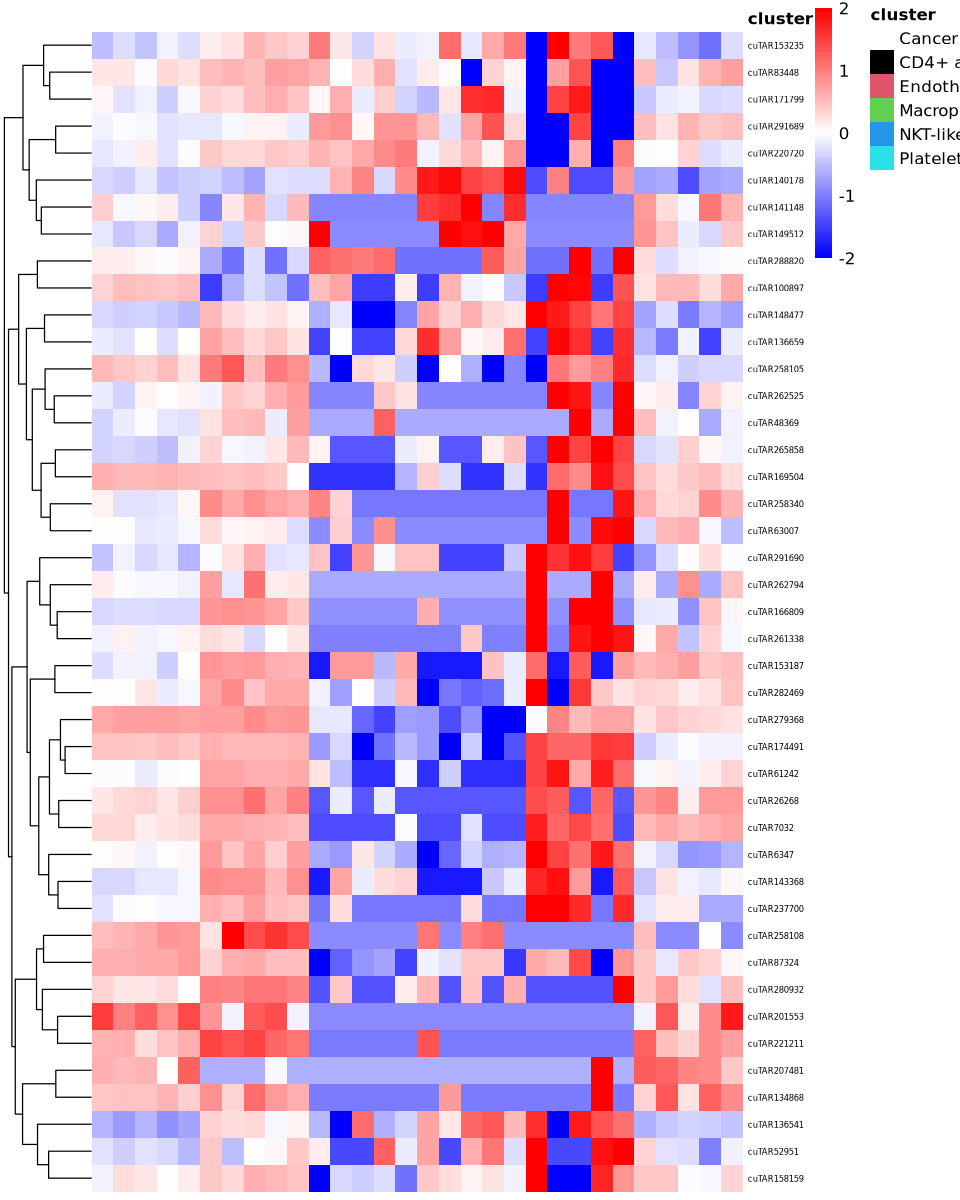

In [129]:
desired_order<-c("1_clusterCancer cells","2_clusterCancer cells","3_clusterCancer cells","4_clusterCancer cells","5_clusterCancer cells","1_clusterCD4+ and CD8+ T-cells","2_clusterCD4+ and CD8+ T-cells","3_clusterCD4+ and CD8+ T-cells","4_clusterCD4+ and CD8+ T-cells","5_clusterCD4+ and CD8+ T-cells","1_clusterEndothelial cells & Fibroblasts","2_clusterEndothelial cells & Fibroblasts","3_clusterEndothelial cells & Fibroblasts","4_clusterEndothelial cells & Fibroblasts","5_clusterEndothelial cells & Fibroblasts","1_clusterMacrophages","2_clusterMacrophages","3_clusterMacrophages","4_clusterMacrophages","5_clusterMacrophages","1_clusterNKT-like cells","2_clusterNKT-like cells","3_clusterNKT-like cells","4_clusterNKT-like cells","5_clusterNKT-like cells","1_clusterPlatelets","2_clusterPlatelets","3_clusterPlatelets","4_clusterPlatelets","5_clusterPlatelets")
lcpm_o <- lcpm[,match(desired_order, colnames(lcpm)), drop = FALSE]


rownames(annot)<-gsub("cluster","",rownames(annot))
annot_o <- annot[match(desired_order, rownames(annot)), , drop = FALSE]



options(repr.plot.width = 8, repr.plot.height = 10)

pheatmap::pheatmap(lcpm_o[topMarkers,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
#grid.text(levels(annot_o$cluster), x = c(0.25, 0.6), y = c(0.89, 0.89),gp = gpa

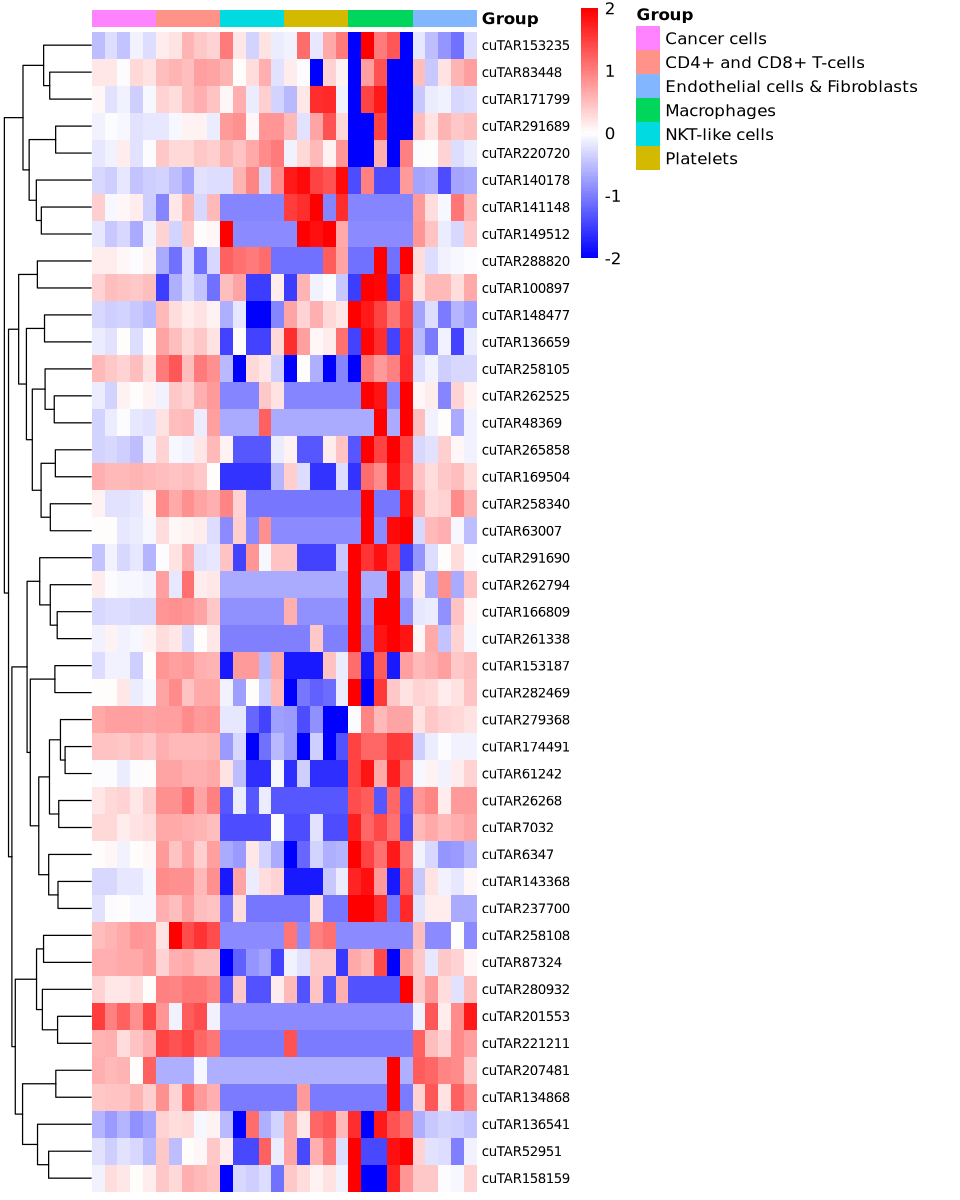

In [137]:
heatmap_data2 <- lcpm_o[c(topMarkers), ]

# Create a column annotation (for KM1 and KM2)
annotation_col <- data.frame(
  Group = rep(c('Cancer cells','CD4+ and CD8+ T-cells','NKT-like cells','Platelets','Macrophages','Endothelial cells & Fibroblasts')
, each = 5)  # Adjust according to your number of columns per group
)

# Set rownames of the annotation to match column names in the heatmap
rownames(annotation_col) <- colnames(heatmap_data2)

pheatmap::pheatmap(
  heatmap_data2,
  breaks = seq(-2, 2, length.out = 101),
  color = colorRampPalette(c("blue", "white", "red"))(100),
  scale = "row",
  cluster_cols = FALSE,
  border_color = "NA",
  fontsize_row = 8,
  show_colnames = FALSE,
  annotation_col = annotation_col)

# Adding the annotation column here


In [130]:
levels(breast)

[1] "Cancer cells"                    "CD4+ and CD8+ T-cells"          
[3] "NKT-like cells"                  "Platelets"                      
[5] "Macrophages"                     "Endothelial cells & Fibroblasts"

In [134]:
annotation_col

,Group
,<chr>
1_clusterCancer cells,Cancer cells
2_clusterCancer cells,Cancer cells
3_clusterCancer cells,Cancer cells
4_clusterCancer cells,Cancer cells
5_clusterCancer cells,Cancer cells
1_clusterCD4+ and CD8+ T-cells,CD4+ and CD8+ T-cells
2_clusterCD4+ and CD8+ T-cells,CD4+ and CD8+ T-cells
3_clusterCD4+ and CD8+ T-cells,CD4+ and CD8+ T-cells
4_clusterCD4+ and CD8+ T-cells,CD4+ and CD8+ T-cells


# Breast

In [156]:
b<-readRDS("breast/uTAR_seurat_obj.rds")
head(rownames(b))
head(b)

[1] "cuTAR100"    "cuTAR100064" "cuTAR100067" "cuTAR100072" "cuTAR100073"
[6] "cuTAR100074"

,nCount_RNA,nFeature_RNA,cell_type,uTARs_snn_res.0.5,seurat_clusters
,<dbl>,<int>,<chr>,<fct>,<fct>
AAACCCAAGATTGGGC.1,6,6,Unknown,0,0
AAACCCAGTACTCCGG.1,93,49,Erythroid-like and erythroid precursor cells,4,4
AAACCCAGTCGTCATA.1,402,187,Pro-B cells,2,2
AAACCCATCCTTCTTC.1,151,95,Macrophages,6,6
AAACCCATCGCCCAGA.1,2,2,Unknown,0,0
AAACGAAAGCTCGCAC.1,187,69,Unknown,3,3
AAACGAAAGGTAATCA.1,37,36,Endothelial,6,6
AAACGAAGTATCGAAA.1,32,31,Unknown,5,5
AAACGAAGTGGACCAA.1,9,6,Unknown,0,0


In [158]:
b2<-subset(b, features = bed$V4)
b
b2

An object of class Seurat 
13887 features across 5680 samples within 1 assay 
Active assay: RNA (13887 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca_uTARs, umap_uTARs

An object of class Seurat 
13753 features across 5680 samples within 1 assay 
Active assay: RNA (13753 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca_uTARs, umap_uTARs

Calculating cluster Cancer cells

Calculating cluster CD4+ and CD8+ T-cells

Calculating cluster NKT-like cells

Calculating cluster Platelets

Calculating cluster Macrophages

Calculating cluster Endothelial cells & Fibroblasts



pdf 
  2

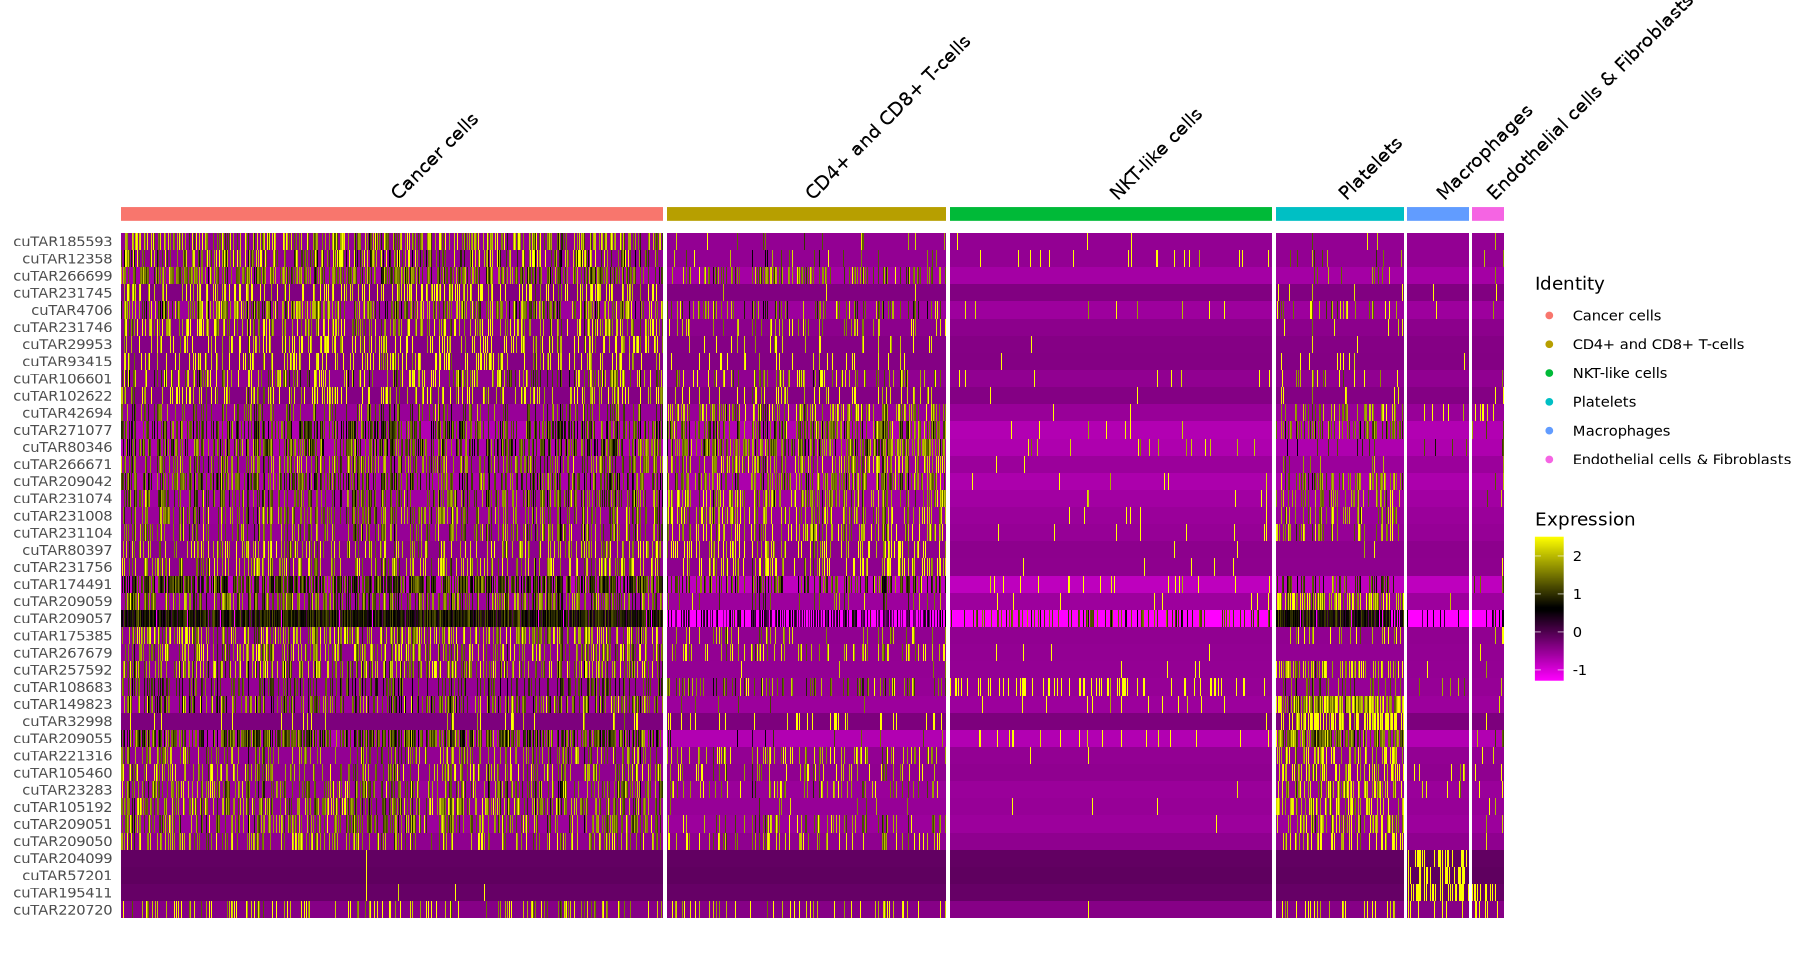

In [161]:
options(repr.plot.width = 15, repr.plot.height = 8)

b2@meta.data$new_cell_types<-breast$new_cell_types
Idents(b2)<-b2@meta.data$new_cell_types
Aall.markers <- FindAllMarkers(b2, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, assay="RNA")
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
#Atop10$gene <- with(replacement_df, ifelse(Atop10$gene %in% V1, V2, Atop10$gene))
pdf("breast/breast_DE_cuTARs.pdf", width=15, height=10)
DoHeatmap(b2, features = Atop10$gene,size = 4)
dev.off()

DoHeatmap(b2, features = Atop10$gene,size = 4)


# Kidney

In [180]:
k_g<-Read10X_h5("/QRISdata/Q4386/scRNA/10X_FF_scRNA_Mac/kidney/5k_human_kidney_tumor_CNIK_5pv2_filtered_feature_bc_matrix.h5")
g_s<-CreateSeuratObject(k_g)

g_s <- NormalizeData(g_s)
g_s <- FindVariableFeatures(g_s, selection.method = "vst", nfeatures = 2000)

g_s <- ScaleData(g_s, verbose = FALSE)
g_s <- RunPCA(g_s, npcs = 30, verbose = FALSE)
g_s <- RunUMAP(g_s, reduction = "pca", dims = 1:30)
g_s <- FindNeighbors(g_s, reduction = "pca", dims = 1:30)
g_s <- FindClusters(g_s, resolution = 0.5)

p <- DimPlot(g_s, reduction = "umap", label = TRUE, repel = TRUE)
pdf("kid/UMAP.pdf")
p
dev.off()

Normalizing layer: counts

Finding variable features for layer counts

17:36:10 UMAP embedding parameters a = 0.9922 b = 1.112

17:36:10 Read 10318 rows and found 30 numeric columns

17:36:10 Using Annoy for neighbor search, n_neighbors = 30

17:36:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:36:11 Writing NN index file to temp file /scratch/temp/13669769/RtmpODEFY3/file3b4306589439c1

17:36:11 Searching Annoy index using 1 thread, search_k = 3000

17:36:14 Annoy recall = 100%

17:36:15 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:36:18 Initializing from normalized Laplacian + noise (using RSpectra)

17:36:18 Commencing optimization for 200 epochs, with 451666 positive edges

17:36:23 Optimization finished

Comput

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10318
Number of edges: 338969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8527
Number of communities: 14
Elapsed time: 2 seconds


pdf 
  2

pdf 
  2

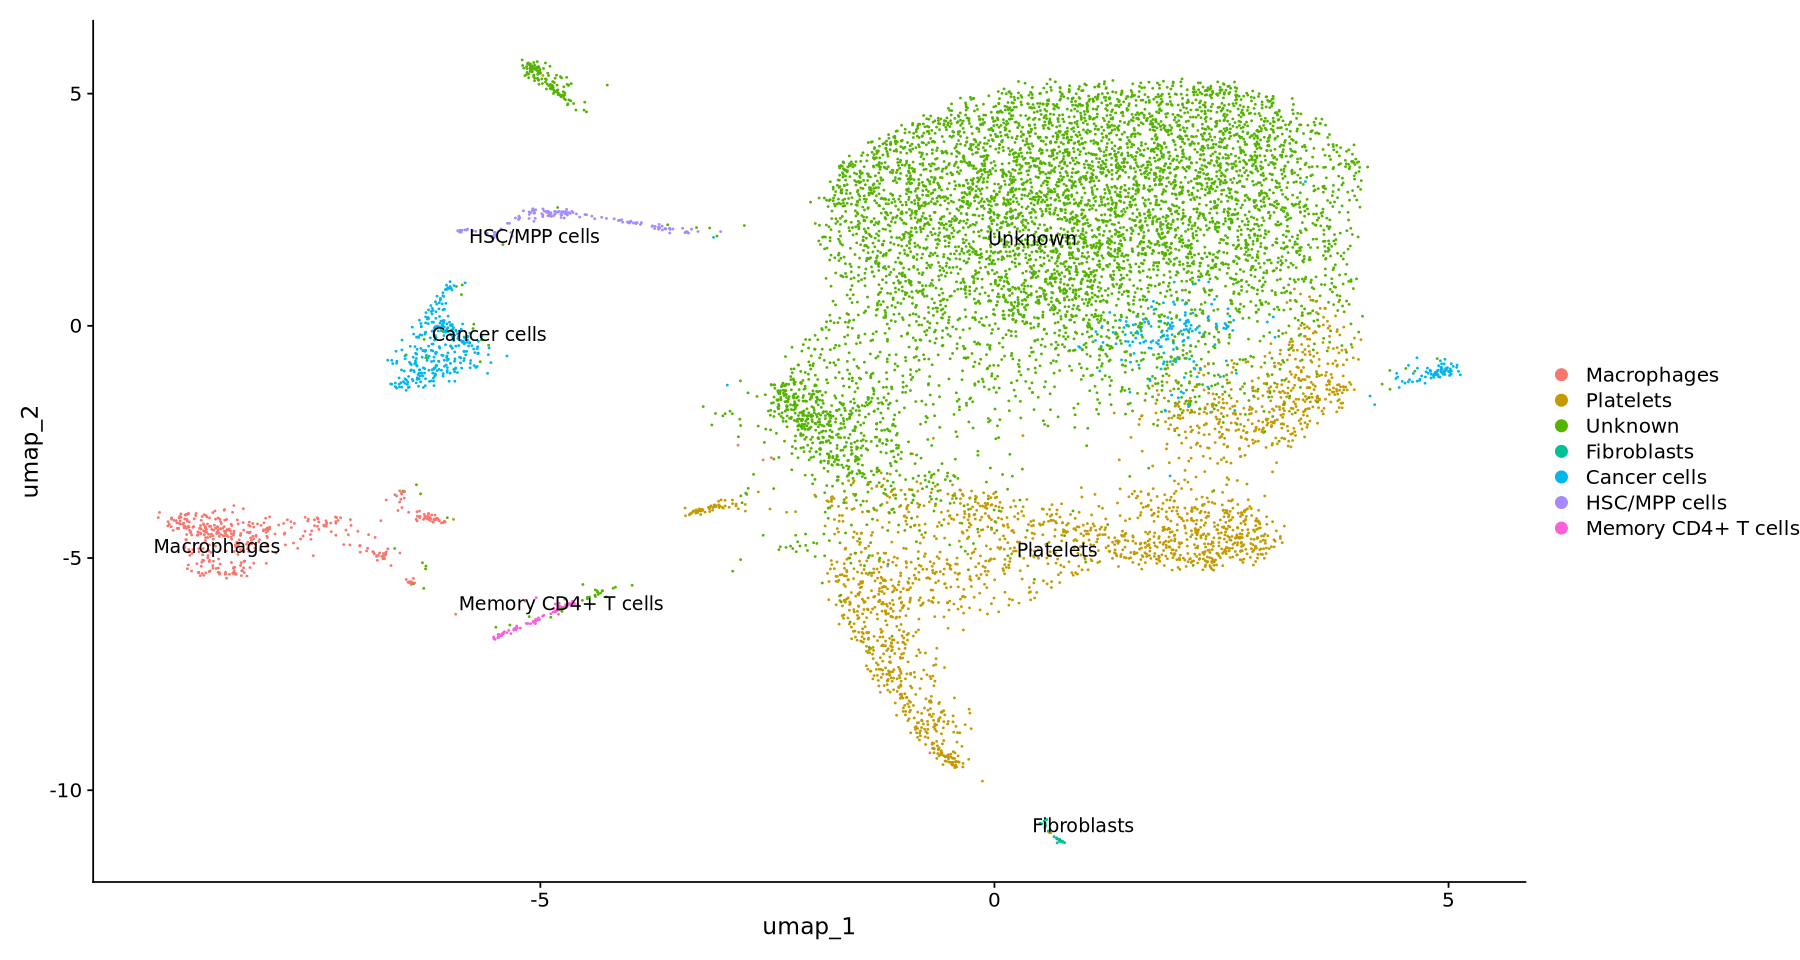

In [184]:
meta$BCs<-gsub("-1",".1",meta$x)
all_col_names<-colnames(g_s)
selected_col_names <- intersect(all_col_names, meta$x)
g_s<-g_s[, selected_col_names]
g_s$cell_type<-meta$gene_cell_types
#uTAR_s$orig.ident<-meta$sample
Idents(g_s)<-g_s$cell_type
p <- DimPlot(g_s, reduction = "umap", label = TRUE, repel = TRUE)
p
pdf("kid/sctypeUMAP.pdf")
p
dev.off()

In [163]:
k_c<-read.csv("/QRISdata/Q4386/all_cuTARs/renamed/Kid5p_uTARs_renamed_final_mat.txt",sep="\t",row.names = 1,header=TRUE)
k<-CreateSeuratObject(k_c)
#meta<-read.csv("cell_types_for_uTARs.txt",sep="\t",header=TRUE)  #glio
meta<-read.csv("/QRISdata/Q4386/scRNA/10X_FF_scRNA_Mac/kidney/sctype_meta.txt",sep="\t",header=TRUE) 

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


In [166]:
head(k_c)
head(meta)

,AAACCTGAGAACTGTA.1,AAACCTGAGCTAACAA.1,AAACCTGAGGGCTTGA.1,AAACCTGAGTGGAGTC.1,AAACCTGCAAACCTAC.1,AAACCTGCAAATTGCC.1,AAACCTGCAAGCCGTC.1,AAACCTGCACCCAGTG.1,AAACCTGCACCGAAAG.1,AAACCTGCACCGTTGG.1,⋯,TTTGTCACACTAAGTC.1,TTTGTCACACTCGACG.1,TTTGTCACAGATGGCA.1,TTTGTCACAGCGATCC.1,TTTGTCACAGGTCGTC.1,TTTGTCAGTAGGCTGA.1,TTTGTCAGTCTCACCT.1,TTTGTCATCAACGAAA.1,TTTGTCATCGTTACAG.1,X
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
cuTAR100,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
cuTAR100097,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
cuTAR100103,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
cuTAR100107,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
cuTAR100108,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
cuTAR100132,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA


,x,gene_cell_types
,<chr>,<chr>
1,AAACCTGAGAACTGTA-1,Macrophages
2,AAACCTGAGCTAACAA-1,Platelets
3,AAACCTGAGGGCTTGA-1,Unknown
4,AAACCTGAGTGGAGTC-1,Unknown
5,AAACCTGCAAACCTAC-1,Unknown
6,AAACCTGCAAATTGCC-1,Platelets


In [167]:
k
dim(meta)

An object of class Seurat 
11906 features across 10319 samples within 1 assay 
Active assay: RNA (11906 features, 0 variable features)
 1 layer present: counts

[1] 10318     2

In [168]:
meta$BCs<-gsub("-1",".1",meta$x)
all_col_names<-colnames(k)
selected_col_names <- intersect(all_col_names, meta$BCs)
k<-k[, selected_col_names]
k$cell_type<-meta$gene_cell_types
#uTAR_s$orig.ident<-meta$sample
Idents(k)<-k$cell_type

In [169]:
k<-subset(k, features = bed$V4)

Normalizing layer: counts

Centering and scaling data matrix

PC_ 1 
Positive:  cuTAR146177, cuTAR290978, cuTAR257239, cuTAR293217, cuTAR143366, cuTAR153885, cuTAR255908, cuTAR279366, cuTAR291454, cuTAR146230 
	   cuTAR271077, cuTAR153170, cuTAR224876, cuTAR293209, cuTAR255903, cuTAR63007, cuTAR46429, cuTAR291690, cuTAR146335, cuTAR134827 
	   cuTAR75951, cuTAR146159, cuTAR46398, cuTAR208277, cuTAR260535, cuTAR280775, cuTAR81304, cuTAR280796, cuTAR251550, cuTAR293204 
Negative:  cuTAR184918, cuTAR259180, cuTAR204606, cuTAR289658, cuTAR229346, cuTAR65509, cuTAR230229, cuTAR32363, cuTAR140209, cuTAR125521 
	   cuTAR147921, cuTAR215354, cuTAR21963, cuTAR229350, cuTAR181224, cuTAR174265, cuTAR37647, cuTAR114727, cuTAR32366, cuTAR150107 
	   cuTAR5208, cuTAR140213, cuTAR38374, cuTAR204622, cuTAR77386, cuTAR143677, cuTAR290055, cuTAR81449, cuTAR215362, cuTAR215364 
PC_ 2 
Positive:  cuTAR153885, cuTAR63007, cuTAR291583, cuTAR224876, cuTAR274769, cuTAR134827, cuTAR81304, cuTAR146335, cuTAR581

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10318
Number of edges: 99223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7722
Number of communities: 18
Elapsed time: 0 seconds


9 singletons identified. 9 final clusters.

Warning message:
“The following arguments are not used: check_duplicates”
17:31:17 UMAP embedding parameters a = 0.9922 b = 1.112

17:31:17 Read 10318 rows and found 30 numeric columns

17:31:17 Using Annoy for neighbor search, n_neighbors = 30

17:31:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:31:19 Writing NN index file to temp file /scratch/temp/13669769/RtmpODEFY3/file3b43065ba7cbbf

17:31:19 Searching Annoy index using 1 thread, search_k = 3000

17:31:22 Annoy recall = 96.7%

17:31:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:31:24 153 smooth knn distance failures

17:31:26 Initializing from normalized Laplacian + noise (using RSpectra)

17:31:26 Commencing opti

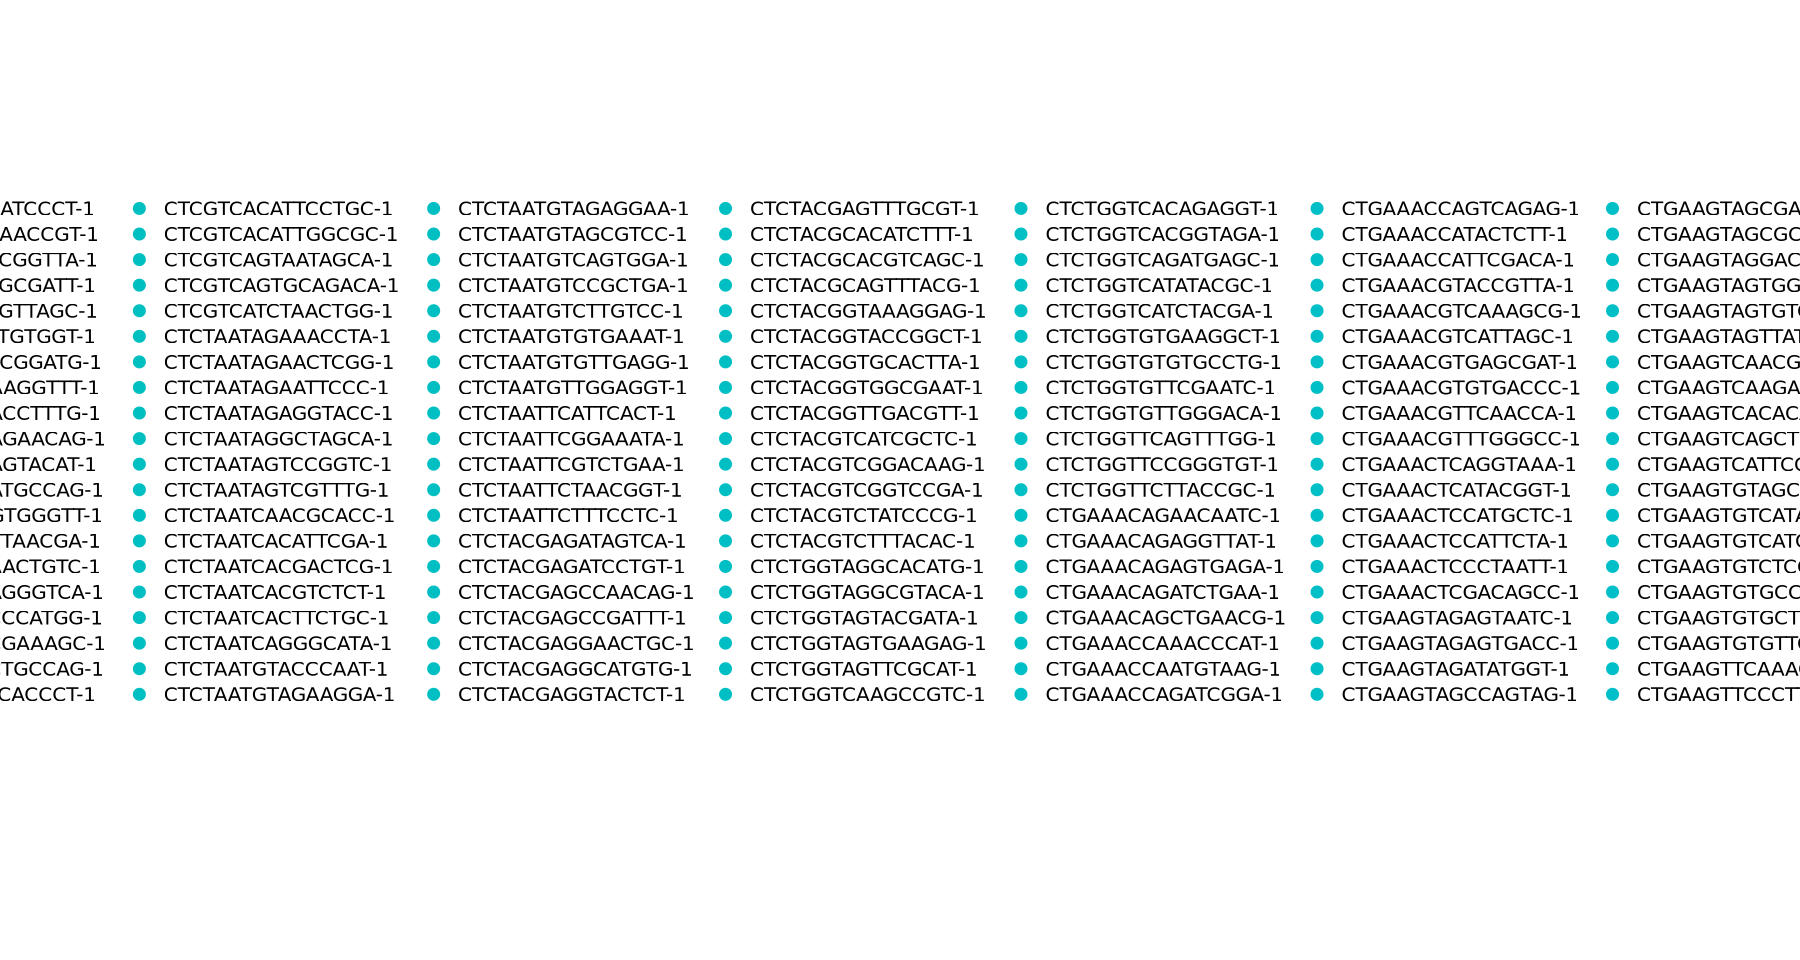

In [171]:
k <- NormalizeData(k)
k <- ScaleData(k, features = rownames(k))
k <- RunPCA(object = k, reduction.name="pca_uTARs",features = rownames(k))
k <- FindNeighbors(object=k, reduction="pca_uTARs", graph.name="uTARs_snn",dims=1:30, )
k <- FindClusters(object=k,graph.name="uTARs_snn",resolution=0.5)
k <- RunUMAP(k,reduction.name="umap_uTARs",reduction="pca_uTARs",dims=1:30,check_duplicates = F)
Idents(k)<-k$cell_type
DimPlot(k)

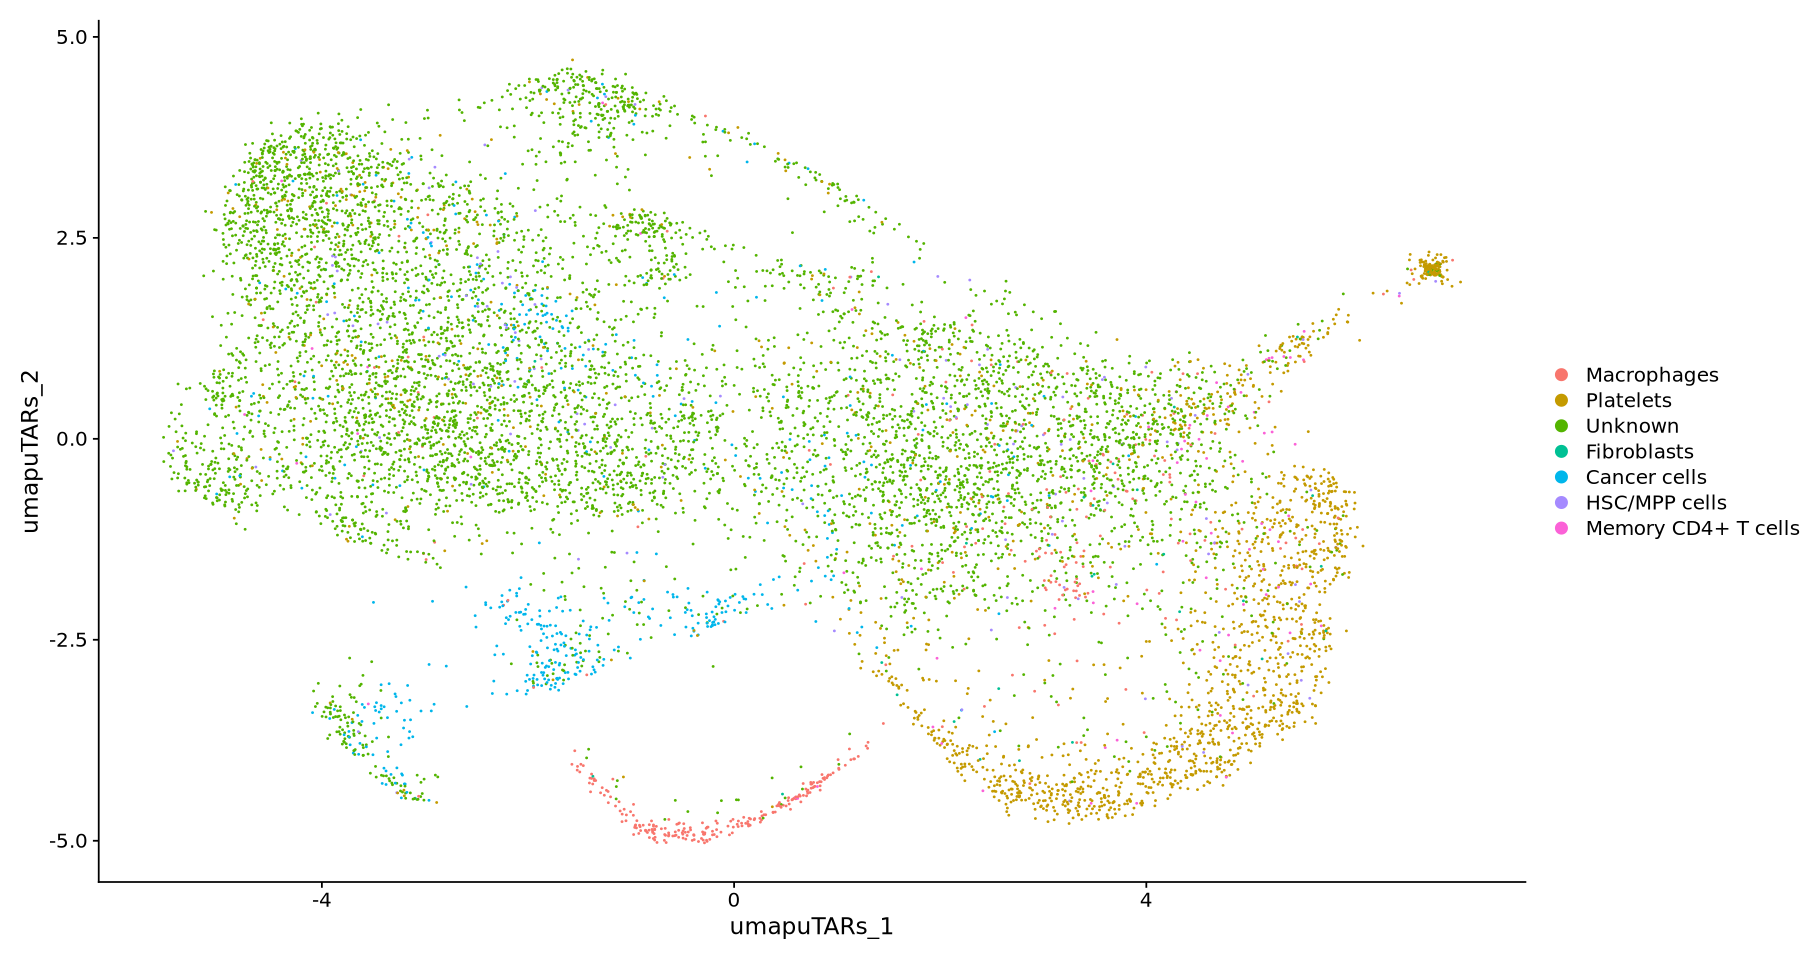

In [177]:
k$cell_type<-meta$gene_cell_types
Idents(k)<-k$cell_type
DimPlot(k)

Calculating cluster Macrophages

Calculating cluster Platelets

Calculating cluster Fibroblasts

Calculating cluster Cancer cells

Calculating cluster HSC/MPP cells

Calculating cluster Memory CD4+ T cells



pdf 
  2

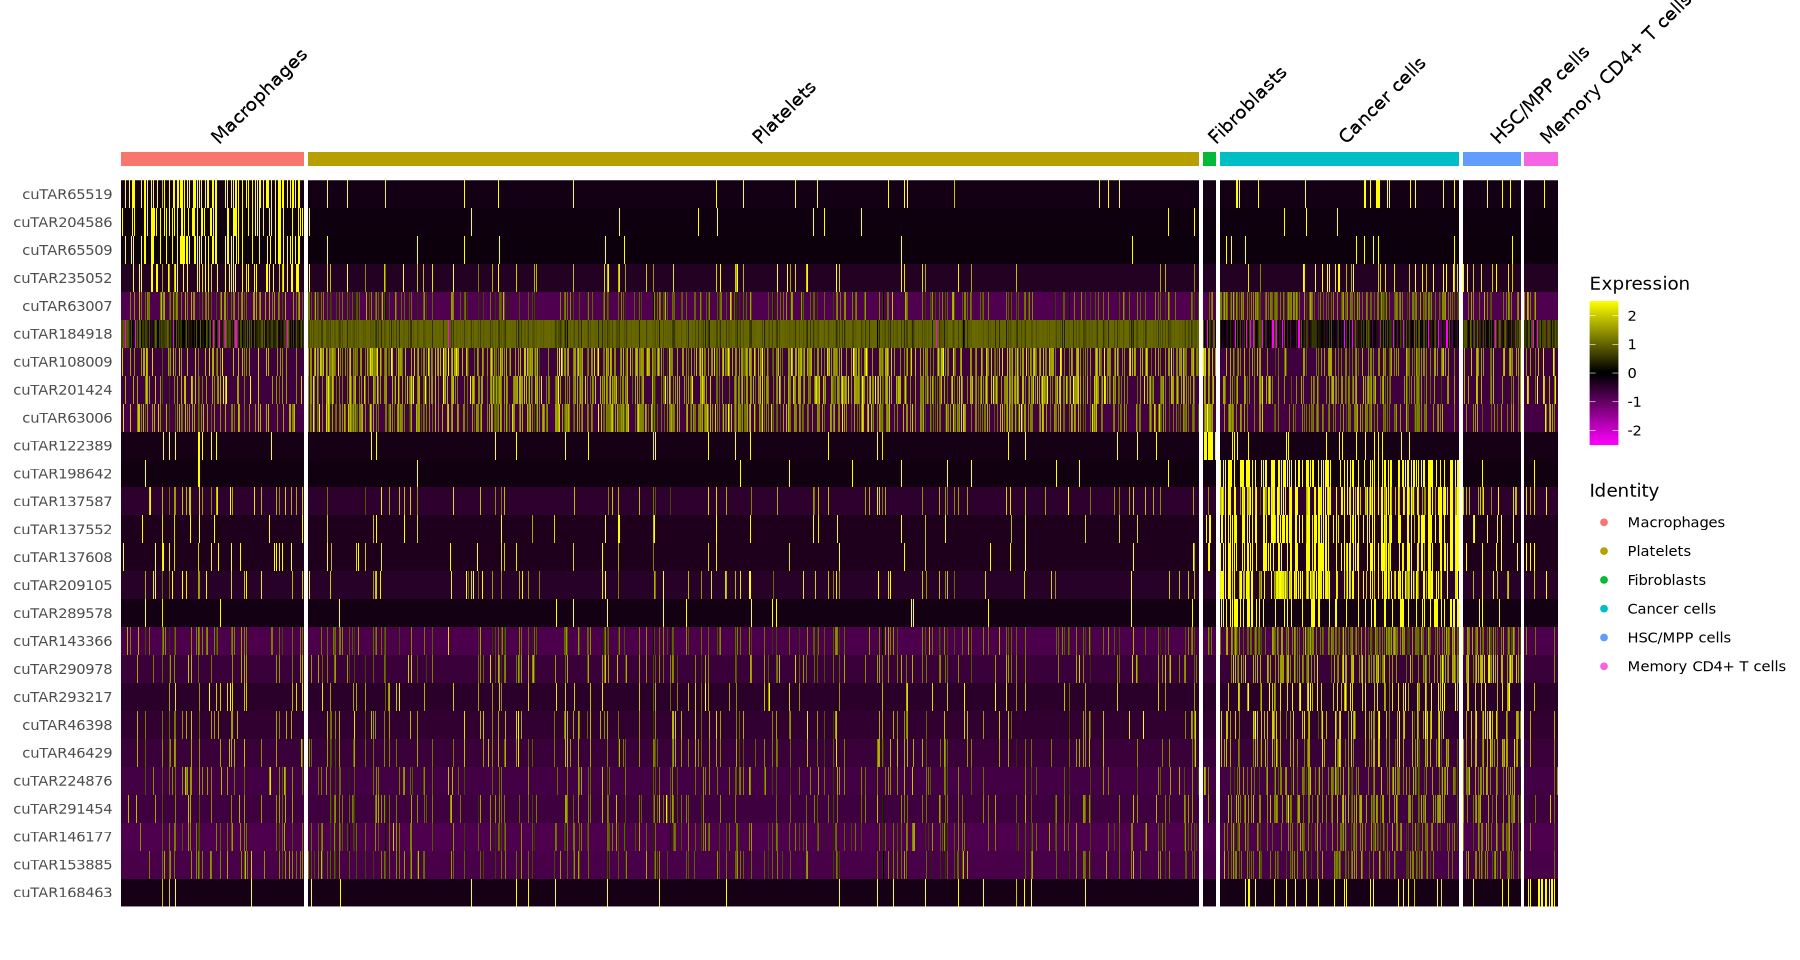

In [178]:
#uTAR <- subset(uTAR_sn, subset = Idents(uTAR_sn) != "Unknown")
identity_to_exclude <- "Unknown"
cell_ids <- colnames(k)[Idents(k) == "Unknown"]
k <- k[, !(colnames(k) %in% cell_ids)]

#replace uTAR IDs
#replacement_df <- read.table("/nfs_master/prakrithi/lncRNA_atlas/all_cancer_combined/renaming/Glio_rename.txt", header = FALSE, stringsAsFactors = FALSE)
#replacement_df <- read.table("/nfs_master/prakrithi/lncRNA_atlas/all_cancer_combined/renamed_list.txt", header = FALSE, stringsAsFactors = FALSE)
#replacement_df$V1<-gsub("_","-",replacement_df$V1)
#new_rownames <- replacement_df$V2[match(rownames(uTAR),replacement_df$V1 )]

Aall.markers <- FindAllMarkers(k, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, assay="RNA")
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
#Atop10$gene <- with(replacement_df, ifelse(Atop10$gene %in% V1, V2, Atop10$gene))
pdf("kid/DE_cuTARsHM.pdf", width=15, height=10)
DoHeatmap(k, features = Atop10$gene,size = 4)
dev.off()

DoHeatmap(k, features = Atop10$gene,size = 4)

saveRDS(k,"kid/uTAR_seurat_obj.rds")

# Glio

In [143]:
g<-readRDS("glio/uTAR_seurat_obj.rds")
head(rownames(g))
head(g)

[1] "cuTAR100"    "cuTAR100000" "cuTAR100001" "cuTAR100063" "cuTAR100064"
[6] "cuTAR100067"

,nCount_RNA,nFeature_RNA,cell_type,uTARs_snn_res.0.5,seurat_clusters
,<dbl>,<int>,<chr>,<fct>,<fct>
AAACCCAAGGCGATAC.1,10,10,Memory CD8+ T cells,6,6
AAACCCACAAGTCCCG.1,262,194,Unknown,0,0
AAACCCACAGATGCGA.1,90,83,Macrophages,5,5
AAACCCACAGGTGAGT.1,77,59,Cancer Cells,2,2
AAACCCAGTCTTGCGG.1,174,145,Progenitor cells,1,1
AAACCCATCGATAACC.1,63,61,Classical Monocytes,6,6
AAACGAAAGACTCAAA.1,144,110,Macrophages,5,5
AAACGAAAGGATGGCT.1,1,1,Unknown,7,7
AAACGAAAGTAATCCC.1,76,71,Non-classical monocytes,4,4


In [145]:
glio2<-subset(g, features = bed$V4)

In [147]:
g
glio2

An object of class Seurat 
20412 features across 5604 samples within 1 assay 
Active assay: RNA (20412 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca_uTARs, umap_uTARs

An object of class Seurat 
20182 features across 5604 samples within 1 assay 
Active assay: RNA (20182 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca_uTARs, umap_uTARs

Calculating cluster Memory CD8+ T cells

Calculating cluster Macrophages

Calculating cluster Cancer Cells

Calculating cluster Progenitor cells

Calculating cluster Classical Monocytes

Calculating cluster Non-classical monocytes

Calculating cluster Neutrophils

Calculating cluster Fibroblasts

Calculating cluster HSC/MPP cells

Calculating cluster Naive CD4+ T cells



pdf 
  2

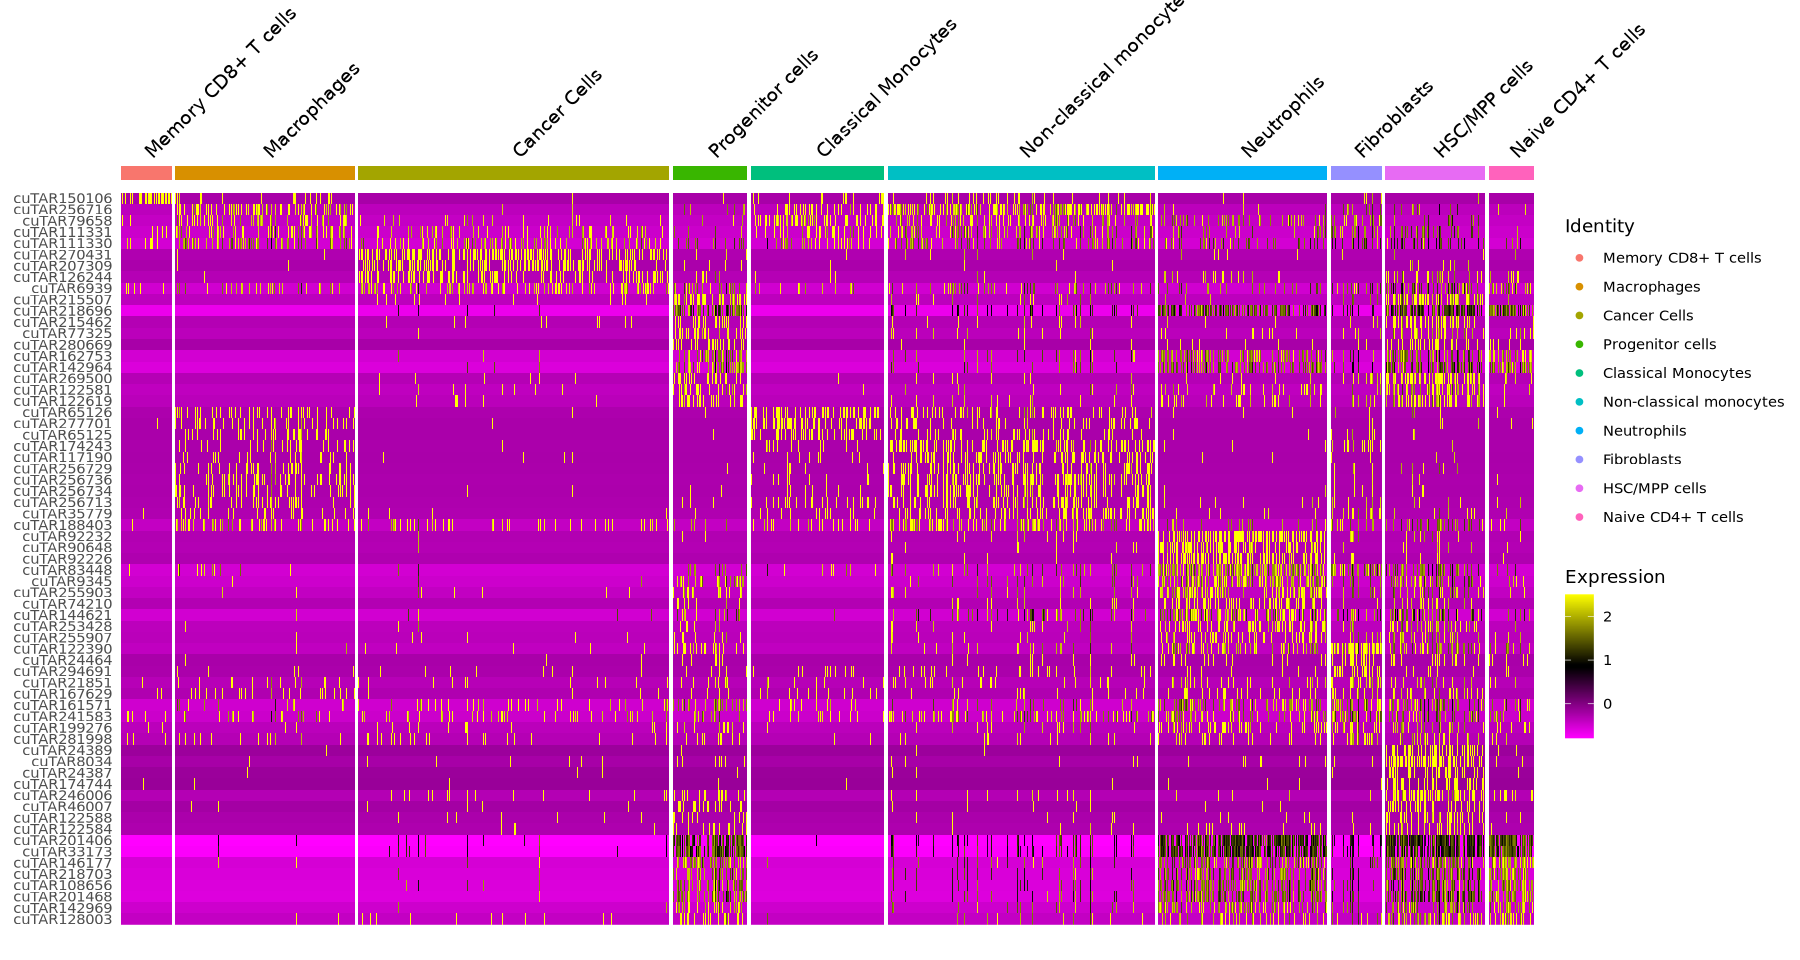

In [179]:
options(repr.plot.width = 15, repr.plot.height = 8)
#uTAR <- subset(uTAR_sn, subset = Idents(uTAR_sn) != "Unknown")
identity_to_exclude <- "Unknown"
cell_ids <- colnames(glio2)[Idents(glio2) == "Unknown"]
glio2 <- glio2[, !(colnames(glio2) %in% cell_ids)]

Aall.markers <- FindAllMarkers(glio2, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, assay="RNA")
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
#Atop10$gene <- with(replacement_df, ifelse(Atop10$gene %in% V1, V2, Atop10$gene))
pdf("glio/glio_DE_cuTARs.pdf", width=15, height=10)
DoHeatmap(glio2, features = Atop10$gene,size = 4)
dev.off()

DoHeatmap(glio2, features = Atop10$gene,size = 4)


In [155]:
write.table(bed$V4,"cuTARs_to_keep_list.txt", quote = FALSE, row.names = FALSE)

# HNB

In [3]:
HNB<-read.csv("../counts/HNB_cuTAR_mat.txt", sep = "\t", row.names = 1)

#HNB<-read.csv("/QRISdata/Q4386/website_data/gene_cuTAR/HNC_website_mat.txt", sep = "\t", row.names = 1)
head(HNB)

,AAACCCGAACGAAATC.1,AAACCGGAAATGTTAA.1,AAACGTGTTCGCCCTA.1,AAACTCGTGATATAAG.1,AAAGACTGGGCGCTTT.1,AAAGGGATGTAGCAAG.1,AAAGGGCAGCTTGAAT.1,AAAGGTAAGCTGTACC.1,AAAGTCACTGATGTAA.1,AAATAAGGTAGTGCCC.1,⋯,TTGGGACACTGCCCGC.1,TTGGGTTTATTCAGCG.1,TTGGTATGGCTTGTGT.1,TTGGTTCGCTCAAAGG.1,TTGTAATCCGTACTCG.1,TTGTCGTTCAGTTACC.1,TTGTTAGCAAATTCGA.1,TTGTTCAGTGTGCTAC.1,TTGTTCTAGATACGCT.1,TTGTTTGTGTAAATTC.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cuTAR100000,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR10001,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR10002,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100317,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100337,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100350,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
#HNB <- HNB[rownames(HNB) %in% bed$V4, ]
HNB_s<-CreateSeuratObject(HNB, min.cells = 3)
HNB_s

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


An object of class Seurat 
2596 features across 1250 samples within 1 assay 
Active assay: RNA (2596 features, 0 variable features)
 1 layer present: counts

In [17]:
#m<-read.csv("/QRISdata/Q4386/polyA_FreshFrozen/Visium15_OPSCC_HeadNeck/B1_remap/outs/HNB_cancer.csv")
m<-read.csv("B1_all_cluster_metadata.csv")
m$Barcode<-gsub("-1",".1",m$Barcode)

head(m)
dim(m)

,Barcode,cluster
,<chr>,<chr>
1,AAACCCGAACGAAATC.1,Normal
2,AAACCGGAAATGTTAA.1,Normal
3,AAACGTGTTCGCCCTA.1,Normal
4,AAACTCGTGATATAAG.1,Normal
5,AAAGACTGGGCGCTTT.1,Normal
6,AAAGGGATGTAGCAAG.1,Normal


[1] 1250    2

In [21]:
head(colnames(HNB_s))

[1] "AAACCCGAACGAAATC.1" "AAACCGGGTAGGTACC.1" "AAACCGTTCGTCCAGG.1"
[4] "AAAGGGATGTAGCAAG.1" "AAAGGGCAGCTTGAAT.1" "AAATCGTGTACCACAA.1"

In [18]:
#HNB <- NormalizeData(pbmc)
HNB_s <- NormalizeData(HNB_s)
HNB_s <- ScaleData(HNB_s, features = rownames(HNB_s))
#top2000<-head(VariableFeatures(genesPHNCn), 2000)
HNB_s<-FindVariableFeatures(HNB_s)
HNB_s <- RunPCA(object = HNB_s, reduction.name="pca")
HNB_s <- FindNeighbors(object=HNB_s, reduction="pca", graph.name="snn",dims=1:30, )
HNB_s <- FindClusters(object=HNB_s,graph.name="snn",resolution=0.2)
HNB_s <- RunUMAP(HNB_s,reduction.name="umap",reduction="pca",dims=1:30,check_duplicates = F)

Normalizing layer: counts

Centering and scaling data matrix

Finding variable features for layer counts

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.6316”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.13676”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.0093916”
PC_ 1 
Positive:  cuTAR12998, cuTAR218761, cuTAR18307, cuTAR43244, cuTAR147663, cuTAR33719, cuTAR131765, cuTAR181377, cuTAR271216, cuTAR218762 
	   cuTAR20319, cuTAR97969, cuTAR301739, cuTAR239707, cuTAR233921, cuTAR155319, cuTAR87587, cuTAR10049, cuTAR5643, cuTAR42821 
	   cuTAR73053, cuTAR226278, cuTAR139625, cuTAR72140, cuTAR52002, cuTAR154843, cuTAR131766, cuTAR155315, cuTAR88

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1250
Number of edges: 13932

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8399
Number of communities: 3
Elapsed time: 0 seconds


1 singletons identified. 2 final clusters.

Warning message:
“The following arguments are not used: check_duplicates”
18:39:41 UMAP embedding parameters a = 0.9922 b = 1.112

18:39:41 Read 1250 rows and found 30 numeric columns

18:39:41 Using Annoy for neighbor search, n_neighbors = 30

18:39:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:39:41 Writing NN index file to temp file /scratch/temp/16437705/RtmpglyCR5/file107a61795766db

18:39:41 Searching Annoy index using 1 thread, search_k = 3000

18:39:41 Annoy recall = 90.16%

18:39:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:39:42 182 smooth knn distance failures

18:39:42 Initializing from normalized Laplacian + noise (using RSpectra)

18:39:42 Commencing opti

In [19]:

#rownames(m)<-m$Barcode
m <- m[m$cluster %in% c("Normal", "Cancer"), ]

m <- m[grepl("\\.1$", m$Barcode), ]
# Get barcodes to keep (only those present in both)
barcodes_to_keep <- intersect(colnames(HNB_s), m$Barcode)

# Subset Seurat object by those barcodes
HNB_s <- subset(HNB_s, cells = barcodes_to_keep)

#m <- m[colnames(HNB_s), , drop = FALSE]

HNB_s@meta.data$cell_type<-m$cluster

# Verify the update
table(HNB_s@meta.data$cell_type)


Cancer Normal 
   275    975 

In [11]:
m[206,]
colnames(HNB_s)[206]

,Barcode,cluster
,<chr>,<chr>
206,AGTTACCCTTAAGACT.1,Cancer


[1] "AGTTACCCTTAAGACT.1"

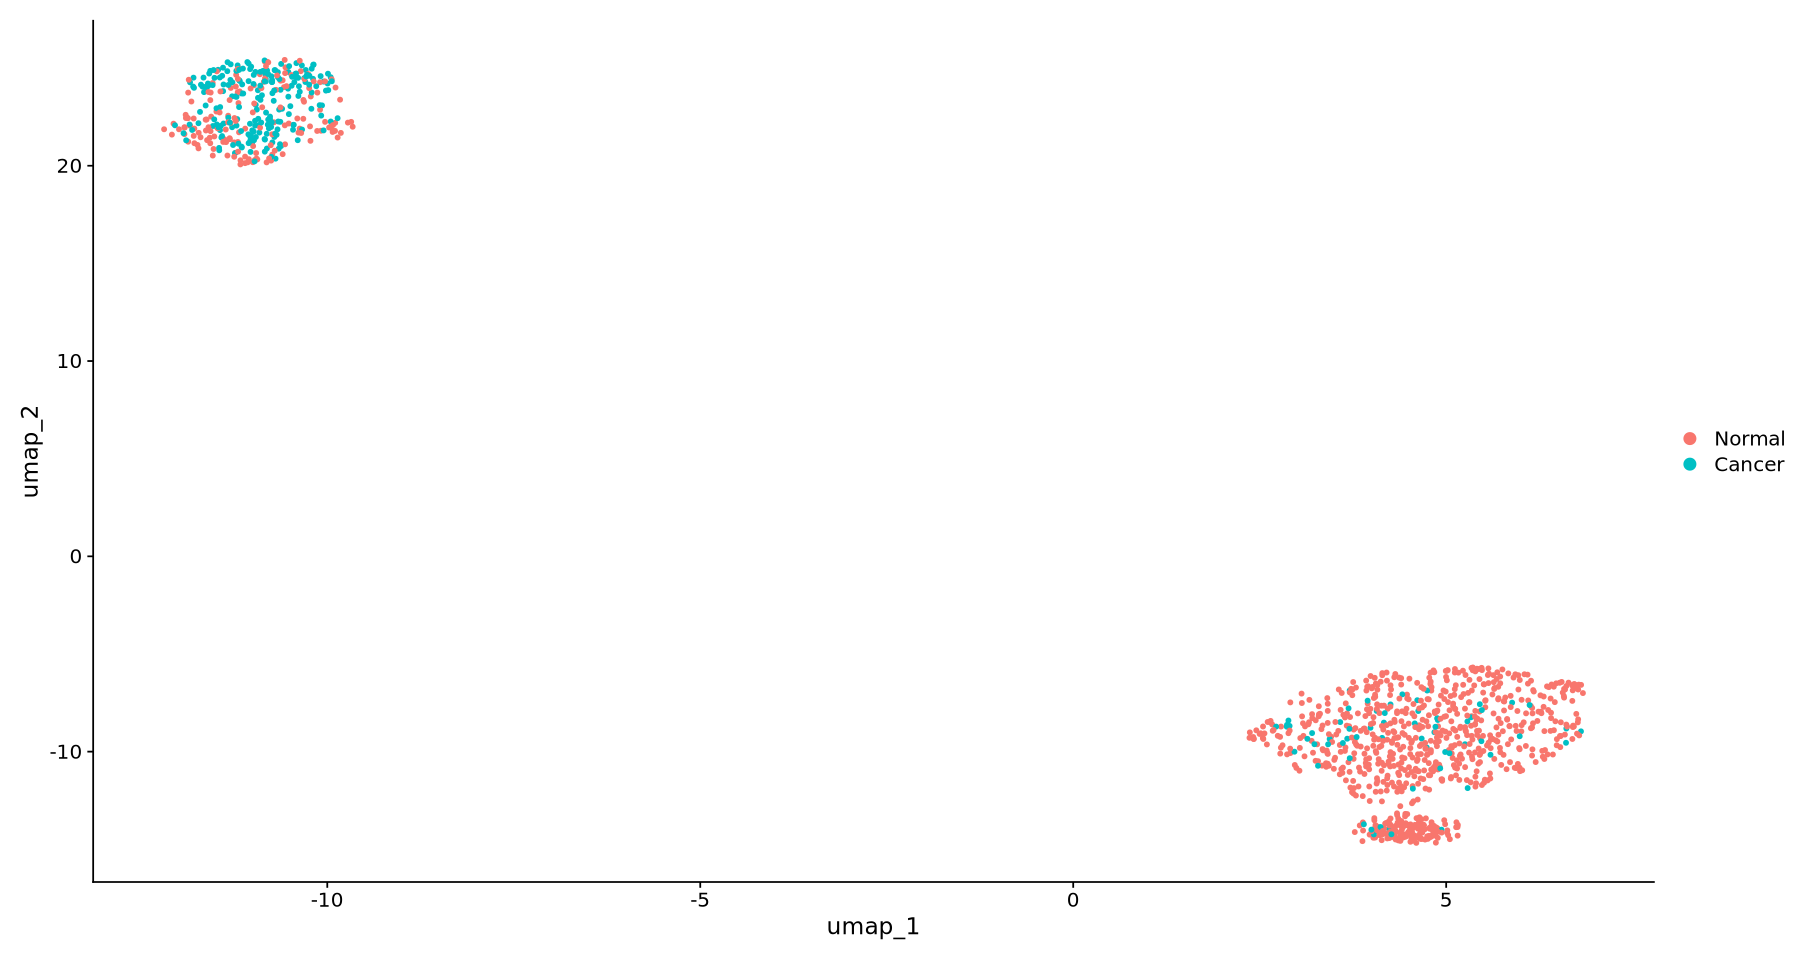

In [20]:
Idents(HNB_s)<-HNB_s$cell_type
DimPlot(HNB_s)

Calculating cluster Normal

Calculating cluster Cancer



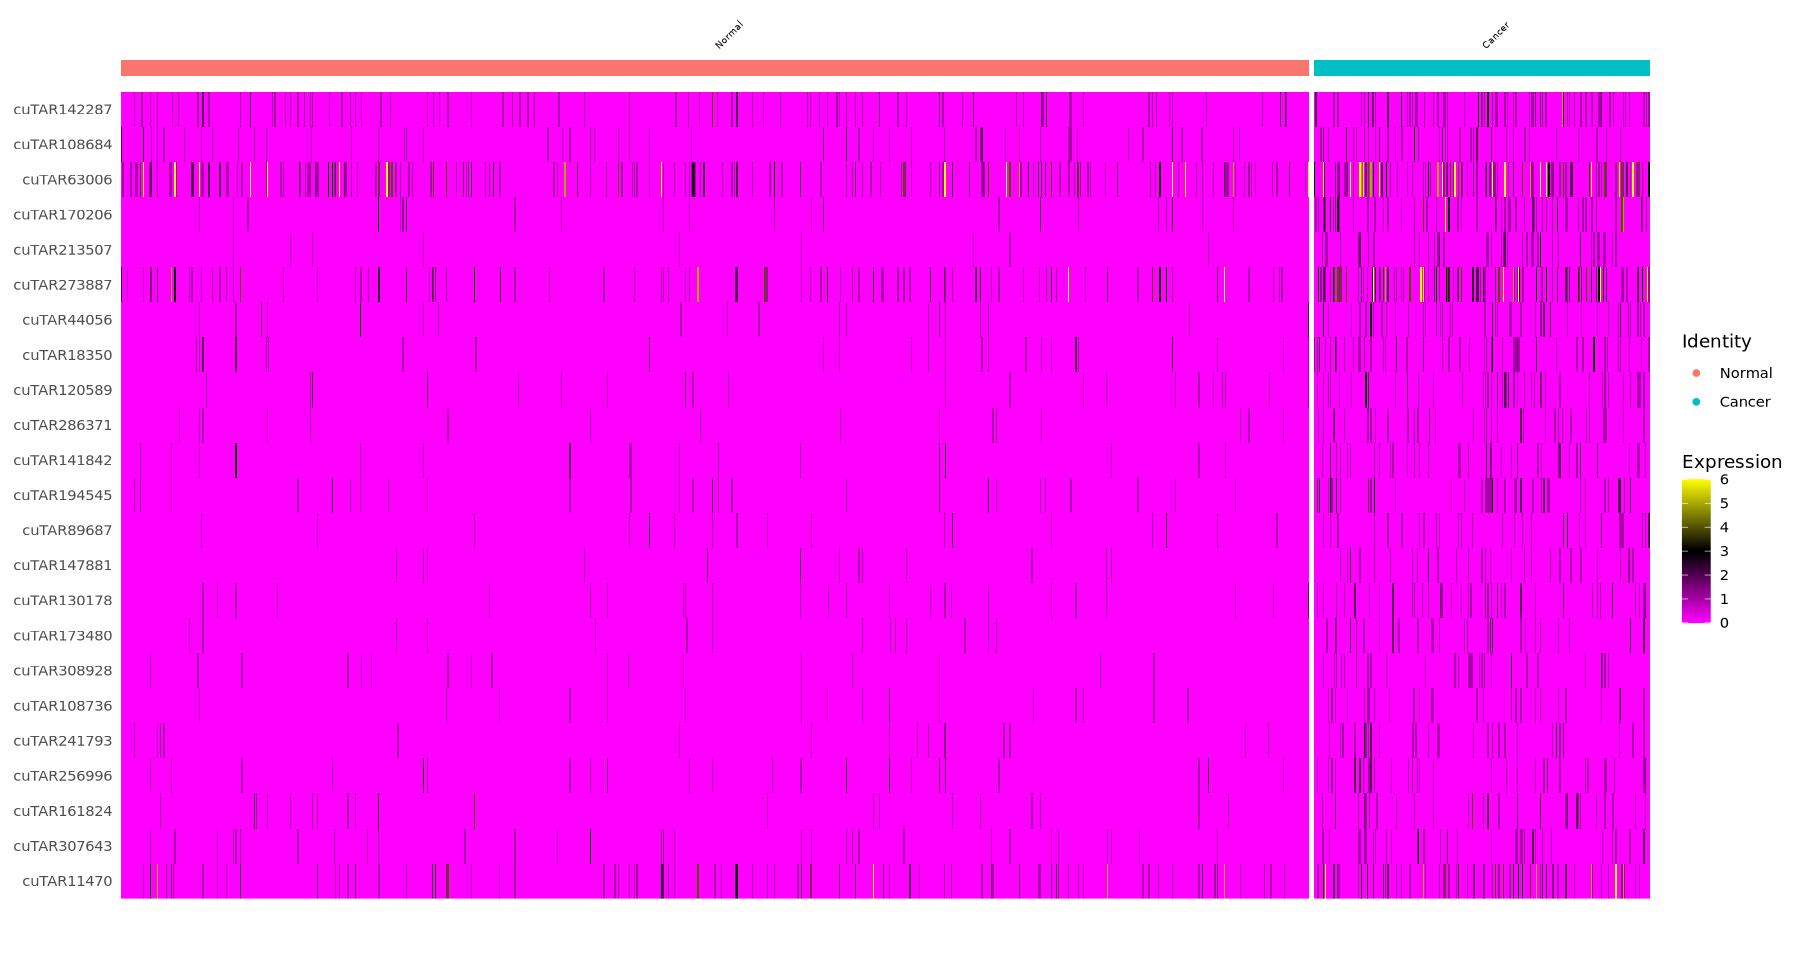

In [50]:
options(repr.plot.width = 15, repr.plot.height = 8)

Aall.markers <- FindAllMarkers(HNB_s, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.5, assay="RNA")
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)
#Atop10$gene <- with(replacement_df, ifelse(Atop10$gene %in% V1, V2, Atop10$gene))
#pdf("HNB_DE_cuTARs.pdf", width=15, height=10)
#DoHeatmap(HNB_s, features = Atop10$gene,size = 4)
#dev.off()

DoHeatmap(HNB_s, features = Atop10$gene,size = 2, slot = "counts")


In [86]:
HNB_s@meta.data$pb_cluster<-""
samples <- unique(HNB_s$cell_type)
for (s in samples) {
  cell_ids <- WhichCells(HNB_s, expression = cell_type == s)
  HNB_s$pb_cluster[cell_ids] <- sample(1:5, length(cell_ids), replace = TRUE)
}
# Check the new 'pb_cluster' column
head(HNB_s$pb_cluster)

Warning message:
“Removing 398 cells missing data for vars requested”
Warning message:
“Removing 398 cells missing data for vars requested”
Warning message:
“Removing 398 cells missing data for vars requested”


AAACCCGAACGAAATC.1 AAACCGGGTAGGTACC.1 AAACCGTTCGTCCAGG.1 AAAGGGATGTAGCAAG.1 
               "1"                 ""                 ""                "4" 
AAAGGGCAGCTTGAAT.1 AAATCGTGTACCACAA.1 
               "1"                 ""

In [57]:
grep("cuTAR170206",rownames(qlf[[1]]$table))

[1] 1337

In [58]:
qlf[[1]]$table[1337,]

,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
cuTAR170206,-1.485794,13.6386,58.49026,2.276311e-14


In [59]:
top <- 10  # Number of top genes to select from each direction (up and down)
topMarkers <- list()

for (i in 1:ncls) {
  # Get the table for the current cluster
  qlf[[i]]$table$FDR <- p.adjust(qlf[[i]]$table$PValue, method = "BH")
  current_table <- qlf[[i]]$table

  # Order genes by PValue, then by logFC (positive and negative separately)
  ordered_genes <- current_table[order(current_table$PValue, decreasing = FALSE), ]
  ordered_genes <- ordered_genes[ordered_genes$FDR < 0.05, ]

  # Filter for upregulated genes (logFC > 0)
  upregulated <- ordered_genes[ordered_genes$logFC > 0, ]
  upregulated <- upregulated[order(-upregulated$logFC), ]  # Sort by descending logFC
  
  # Filter for downregulated genes (logFC < 0)
  downregulated <- ordered_genes[ordered_genes$logFC < 0, ]
  downregulated <- downregulated[order(downregulated$logFC), ]  # Sort by ascending logFC
  
  # Remove unwanted genes (e.g., RPS, RPL, LINC)
  upregulated <- upregulated[!grepl("^RPS|^RPL|^LINC", rownames(upregulated)), ]
  downregulated <- downregulated[!grepl("^RPS|^RPL|^LINC", rownames(downregulated)), ]
  
  # Select top N genes from both up and down
  top_up <- head(rownames(upregulated), top)
  top_down <- head(rownames(downregulated), top)
  
  # Combine selected genes for this cluster
  topMarkers[[i]] <- c(top_up, top_down)
}

# Combine all selected genes into a single list
combined_topMarkers <- unlist(topMarkers, use.names = FALSE)

# Remove duplicates if necessary
combined_topMarkers <- unique(combined_topMarkers)

# Print the total number of genes in the final list
length(combined_topMarkers)

# Final result: `combined_topMarkers` contains top genes (upregulated and downregulated) for all clusters
topMarkers <-combined_topMarkers

[1] 8

In [60]:
lcpm<-cpm(y,log=TRUE) 
annot<-data.frame(cluster=cluster) 
rownames(annot)<-colnames(y) 
ann_colors<-list(cluster=0:5) 
names(ann_colors$cluster)<-levels(cluster)

In [61]:
colnames(lcpm)

[1] "1_clusterCancer" "1_clusterNormal" "2_clusterCancer" "2_clusterNormal"
 [5] "3_clusterCancer" "3_clusterNormal" "4_clusterCancer" "4_clusterNormal"
 [9] "5_clusterCancer" "5_clusterNormal"

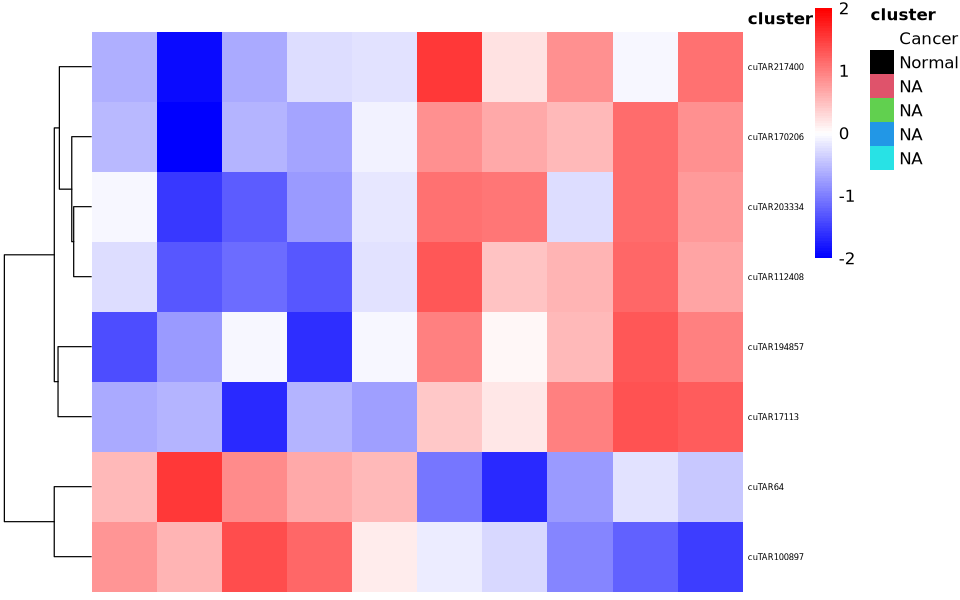

In [63]:
desired_order<-c("1_clusterCancer","2_clusterCancer","3_clusterCancer","4_clusterCancer","5_clusterCancer",
                 "1_clusterNormal","2_clusterNormal","3_clusterNormal","4_clusterNormal","5_clusterNormal")
lcpm_o <- lcpm[,match(desired_order, colnames(lcpm)), drop = FALSE]


rownames(annot)<-gsub("cluster","",rownames(annot))
annot_o <- annot[match(desired_order, rownames(annot)), , drop = FALSE]



options(repr.plot.width = 8, repr.plot.height = 5)

pheatmap::pheatmap(lcpm_o[topMarkers,],breaks=seq(-2,2,length.out=101),color=colorRampPalette(c("blue","white","red"))(100),scale="row",
                   cluster_cols=FALSE,border_color="NA",fontsize_row=5,
                   show_colnames=FALSE,
                   annotation_col=annot_o,annotation_colors=ann_colors)
#grid.text(levels(annot_o$cluster), x = c(0.25, 0.6), y = c(0.89, 0.89),gp = gpa

# HNC

In [28]:
#HNC<-read.csv("/QRISdata/Q4386/website_data/HNC_", sep = " ", row.names = 1)
#HNC<-read.csv("/QRISdata/Q4386/website_data/gene_cuTAR/HNC_website_mat.txt", sep = "\t", row.names = 1)
HNC<-read.csv("../counts/HNC_cuTAR_mat.txt", sep = "\t", row.names = 1)

head(HNC)

,AAACCCGAACGAAATC.1,AAACCGGGTAGGTACC.1,AAACCGTTCGTCCAGG.1,AAAGGGATGTAGCAAG.1,AAAGGGCAGCTTGAAT.1,AAATCGTGTACCACAA.1,AAATGCTCGTTACGTT.1,AAATGGTCAATGTGCC.1,AAATTAACGGGTAGCT.1,AAATTACCTATCGATG.1,⋯,TTGGGACACTGCCCGC.1,TTGGTCACACTCGTAA.1,TTGGTTCGCTCAAAGG.1,TTGTAAGGACCTAAGT.1,TTGTAATCCGTACTCG.1,TTGTCGTTCAGTTACC.1,TTGTGGCCCTGACAGT.1,TTGTTAGCAAATTCGA.1,TTGTTCAGTGTGCTAC.1,TTGTTTCCATACAACT.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cuTAR10001,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100103,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100174,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100395,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR10049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cuTAR100492,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [32]:
HNC <- HNC[HNC$cuTAR32 %in% bed$V4, ]

dim(HNC)

NULL

In [29]:
#HNC <- HNC[rownames(HNC) %in% bed$V4, ]
HNC_s<-CreateSeuratObject(HNC)
HNC_s

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


An object of class Seurat 
4969 features across 1090 samples within 1 assay 
Active assay: RNA (4969 features, 0 variable features)
 1 layer present: counts

In [30]:
#HNB <- NormalizeData(pbmc)
HNC_s <- NormalizeData(HNC_s)
HNC_s <- ScaleData(HNC_s, features = rownames(HNC_s))
#top2000<-head(VariableFeatures(genesPHNCn), 2000)
HNC_s<-FindVariableFeatures(HNC_s)
HNC_s <- RunPCA(object = HNC_s, reduction.name="pca")
HNC_s <- FindNeighbors(object=HNC_s, reduction="pca", graph.name="snn",dims=1:30, )
HNC_s <- FindClusters(object=HNC_s,graph.name="snn",resolution=0.2)
HNC_s <- RunUMAP(HNC_s,reduction.name="umap",reduction="pca",dims=1:30,check_duplicates = F)

Normalizing layer: counts

Centering and scaling data matrix

Finding variable features for layer counts

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.0534”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.31705”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.031008”
PC_ 1 
Positive:  cuTAR170206, cuTAR194857, cuTAR17113, cuTAR203334, cuTAR112408, cuTAR133926, cuTAR119532, cuTAR250480, cuTAR36153, cuTAR95585 
	   cuTAR170202, cuTAR3580, cuTAR269882, cuTAR217400, cuTAR260005, cuTAR246804, cuTAR110957, cuTAR195360, cuTAR173927, cuTAR123655 
	   cuTAR153773, cuTAR125518, cuTAR74556, cuTAR285902, cuTAR177185, cuTAR181996, cuTAR272076, cuTAR145700, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1090
Number of edges: 11429

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 7
Elapsed time: 0 seconds


5 singletons identified. 2 final clusters.

Warning message:
“The following arguments are not used: check_duplicates”
18:43:59 UMAP embedding parameters a = 0.9922 b = 1.112

18:43:59 Read 1090 rows and found 30 numeric columns

18:43:59 Using Annoy for neighbor search, n_neighbors = 30

18:43:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:43:59 Writing NN index file to temp file /scratch/temp/16437705/RtmpglyCR5/file107a61786153cf

18:43:59 Searching Annoy index using 1 thread, search_k = 3000

18:43:59 Annoy recall = 93.3%

18:44:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:44:00 116 smooth knn distance failures

18:44:00 Initializing from normalized Laplacian + noise (using RSpectra)

18:44:00 Commencing optim

In [40]:
#m<-read.csv("/QRISdata/Q4386/polyA_FreshFrozen/Visium15_OPSCC_HeadNeck/B1_remap/outs/HNB_cancer.csv")
m<-read.csv("/QRISdata/Q4386/polyA_FreshFrozen/Visium15_OPSCC_HeadNeck/C1_remap/outs/HNC_celltypes_Cancer.csv")
#m$Barcode<-gsub("-1",".1",m$Barcode)
m$cell <- gsub("-1",".1", m$cell)

head(m)
dim(m)

,cell,group
,<chr>,<chr>
1,AAACCCGAACGAAATC.1,Normal
2,AAACCGGGTAGGTACC.1,Normal
3,AAACCGTTCGTCCAGG.1,Cancer
4,AAAGGGATGTAGCAAG.1,Normal
5,AAAGGGCAGCTTGAAT.1,Cancer
6,AAATCGTGTACCACAA.1,Cancer


[1] 1090    2

In [43]:

#rownames(m)<-m$Barcode
m <- m[m$group %in% c("Normal", "Cancer"), ]
#m <- m[grepl("\\.1$", m$Barcode), ]
# Get barcodes to keep (only those present in both)
barcodes_to_keep <- intersect(colnames(HNC_s), m$cell)

# Subset Seurat object by those barcodes
HNC_s <- subset(HNC_s, cells = barcodes_to_keep)

#m <- m[colnames(HNB_s), , drop = FALSE]

HNC_s@meta.data$cell_type<-m$group

# Verify the update
table(HNC_s@meta.data$cell_type)


Cancer Normal 
   700    390 

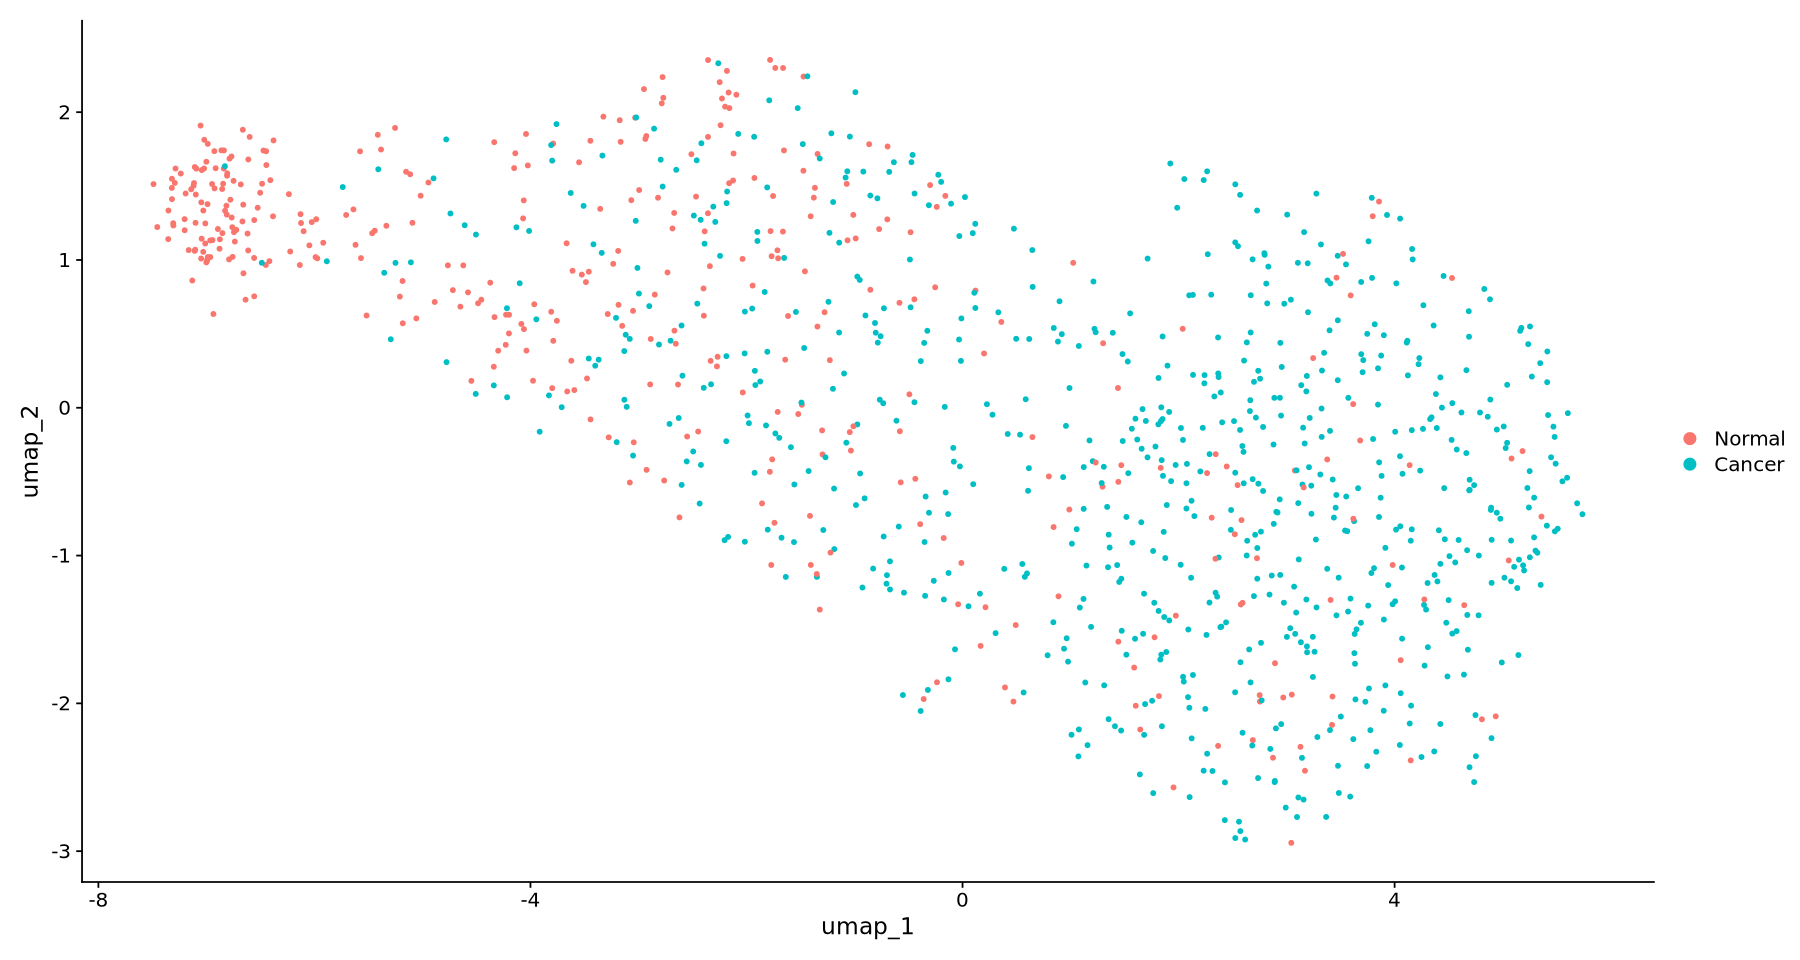

In [44]:
Idents(HNC_s)<-HNC_s$cell_type
DimPlot(HNC_s)

Calculating cluster Normal

Calculating cluster Cancer



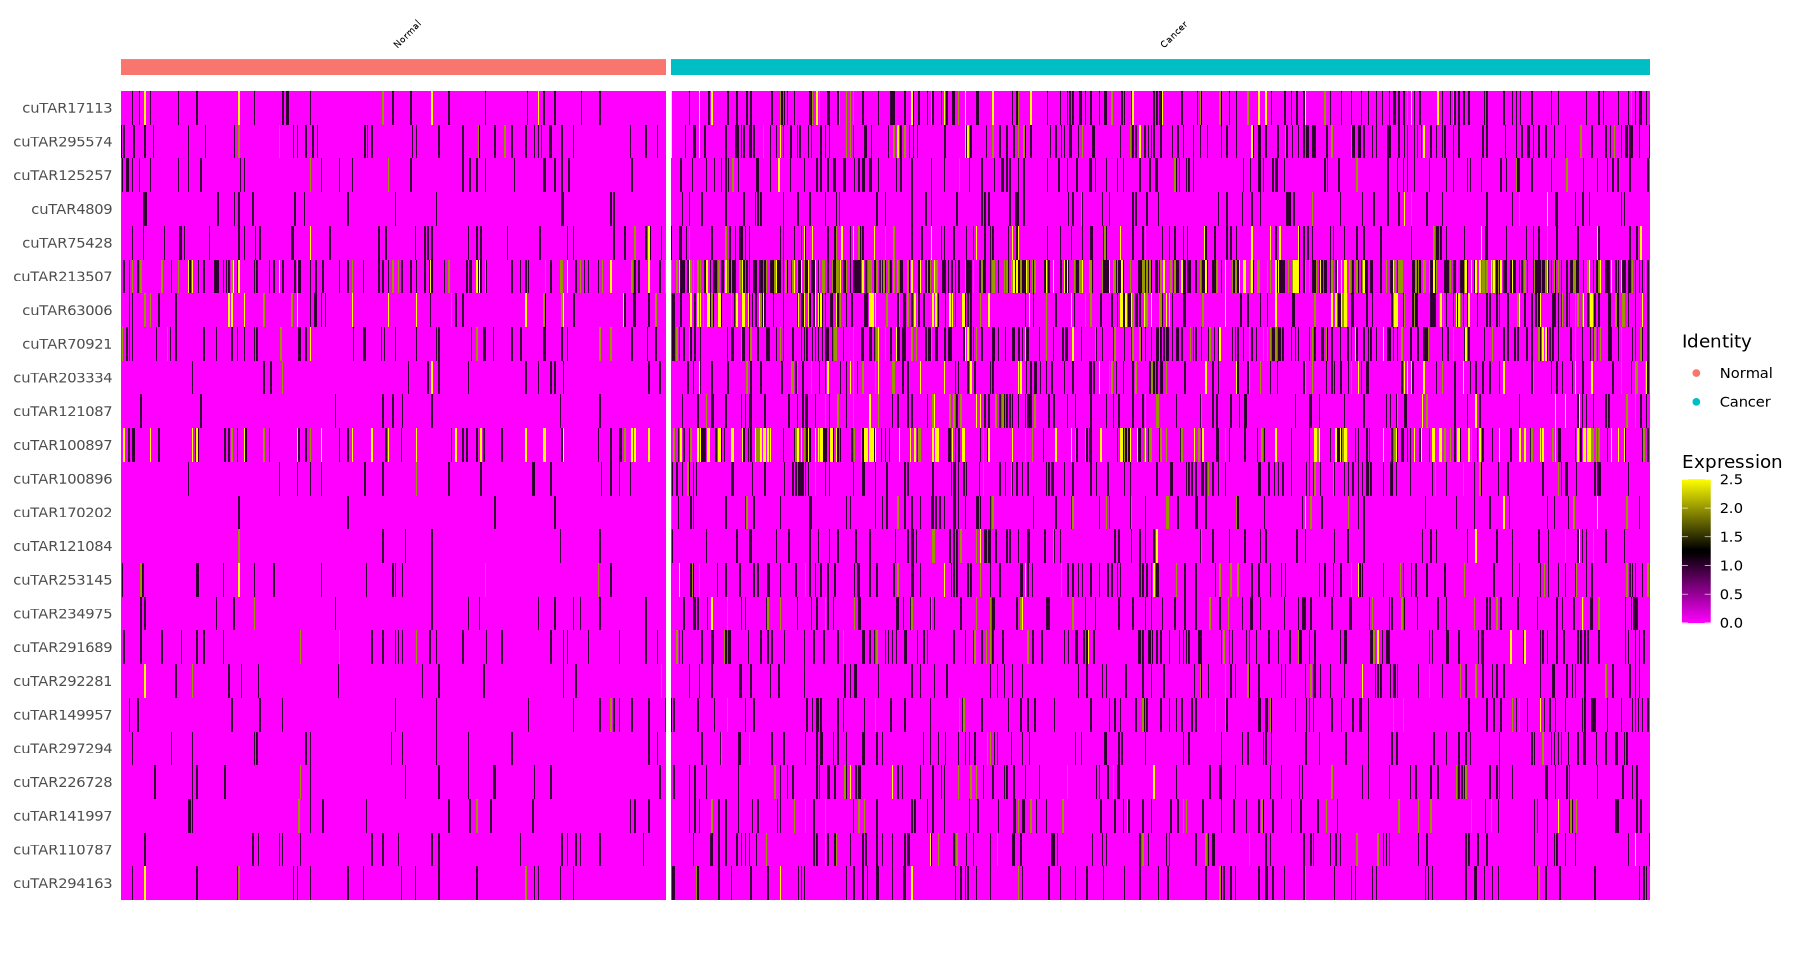

In [49]:
options(repr.plot.width = 15, repr.plot.height = 8)

Aall.markers <- FindAllMarkers(HNC_s, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.5, assay="RNA")
Atop10 <- Aall.markers %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)
#Atop10$gene <- with(replacement_df, ifelse(Atop10$gene %in% V1, V2, Atop10$gene))
#pdf("HNB_DE_cuTARs.pdf", width=15, height=10)
#DoHeatmap(HNB_s, features = Atop10$gene,size = 4)
#dev.off()

DoHeatmap(HNC_s, features = Atop10$gene,size = 2, slot = "counts", disp.max = 2.5)


# Ovarian

In [ ]:
o<-Read10X_h5("/QRISdata/Q4386/scRNA/scRNA_public_Mac/ovarian/5k_human_ovarian_tumor_CNIK_5pv2_filtered_feature_bc_matrix.h5")
oc<-Cre
head(rownames(o))
head(o)